**Importing the Necessary Python Libraries for Data Analysis.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
sns.set(color_codes=True)
import plotly.graph_objects as ply
import plotly.figure_factory as ff
import plotly.express as px
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

**Problem Statement 1**

For this particular assignment, the data of different types of wine sales in the 20th century is to be analyzed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyze and forecast Wine Sales in the 20th century.

#### 1. Read the data as an appropriate Time Series data and plot the data.

##### Loading the Dataset csv file of Problem Statement 1.

In [2]:
df_1 = pd.read_csv("Rose.csv")

##### Checking the Records of the Dataset.

In [3]:
df_1.head(10) #Head of the Dataset - First 10 Records of the Dataset.

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0
5   1980-06  168.0
6   1980-07  118.0
7   1980-08  129.0
8   1980-09  205.0
9   1980-10  147.0

In [4]:
df_1.tail(10) #Tail of the Dataset - Last 10 Records of the Dataset.

YearMonth  Rose
177   1994-10  51.0
178   1994-11  63.0
179   1994-12  84.0
180   1995-01  30.0
181   1995-02  39.0
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

##### Plot of the Data

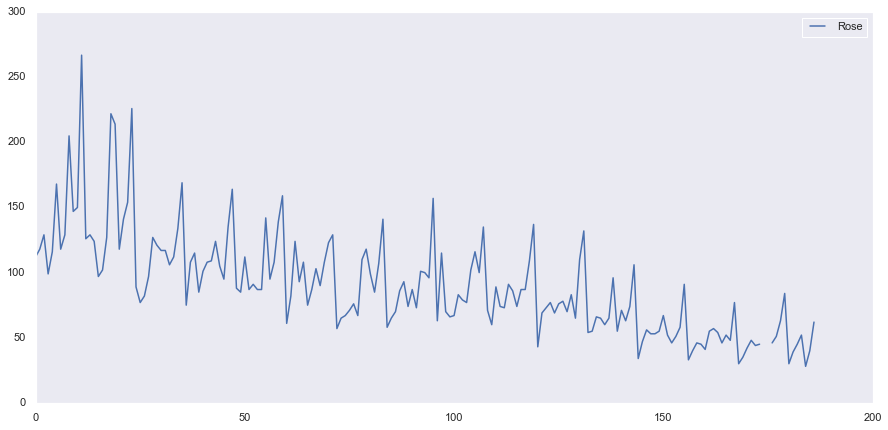

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,7
df_1.plot();
plt.grid()

<span class="burk">Note</span>

Though the above plot looks like a Time Series plot, notice that the X-Axis is not time. In order to make the X-Axis as a Time Series, we need to pass the date range manually through a command in Pandas.

##### Adding the Time Stamp into Dataset.

In [6]:
Date= pd.date_range(start= '1/1/1980', end='8/1/1995', freq='M')

<span class="burk">Note</span>

The time stamps (in the above code snippet) is defined as a monthly Time Series after looking at the data.Data given to us is start from Jan 1980 to July 1995 , In order to make the X-Axis as a Time Series, we need to pass the date range from start= '1/1/1980', end='8/1/1995' as we know that the when we using this data_range function always creates the time stamp with the last day of that month,when we include this into dataset we will see that the first observation of the time stamp will be 31 Jan 1980 , so in order to include the July we will write the end period as end='8/1/1995' now it automatically take the last day of July 31 for this dataset,as we know the frequency is "monthly" so we set it freq = "M".

In [7]:
Date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

<span class="burk">Note</span>

Last date of every month is being used here from 31 Jan 1980 till 31 July 1995.

In [8]:
df_1['Time_Stamp'] = pd.DataFrame(Date,columns=['Month'])

##### Checking the Records of the Dataset after adding Time_Stamp.

In [9]:
df_1.head(10) #Head of the Dataset - First 10 Records of the Dataset.

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31
5   1980-06  168.0 1980-06-30
6   1980-07  118.0 1980-07-31
7   1980-08  129.0 1980-08-31
8   1980-09  205.0 1980-09-30
9   1980-10  147.0 1980-10-31

In [10]:
df_1.tail(10) #Tail of the Dataset - Last 10 Records of the Dataset.

YearMonth  Rose Time_Stamp
177   1994-10  51.0 1994-10-31
178   1994-11  63.0 1994-11-30
179   1994-12  84.0 1994-12-31
180   1995-01  30.0 1995-01-31
181   1995-02  39.0 1995-02-28
182   1995-03  45.0 1995-03-31
183   1995-04  52.0 1995-04-30
184   1995-05  28.0 1995-05-31
185   1995-06  40.0 1995-06-30
186   1995-07  62.0 1995-07-31

##### Dropping the Unusual column like Year-Month & Set Index to Time Stamp.

In [11]:
df = df_1.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head(10)

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0
1980-06-30  168.0
1980-07-31  118.0
1980-08-31  129.0
1980-09-30  205.0
1980-10-31  147.0

##### Changing the Name of the Rose Column to Rose Wines Sales for Better Understandings.

In [12]:
df.rename(columns = {'Rose':'Rose Wine Sales'}, inplace = True)

In [13]:
df.head()

Rose Wine Sales
Time_Stamp                 
1980-01-31            112.0
1980-02-29            118.0
1980-03-31            129.0
1980-04-30             99.0
1980-05-31            116.0

<span class="burk">Note</span>

Now we successfully creates the Time Series object, let us go ahead and analyze the Time Series plot that we got.

##### Plot of the Data After Adding Time_Stamp.

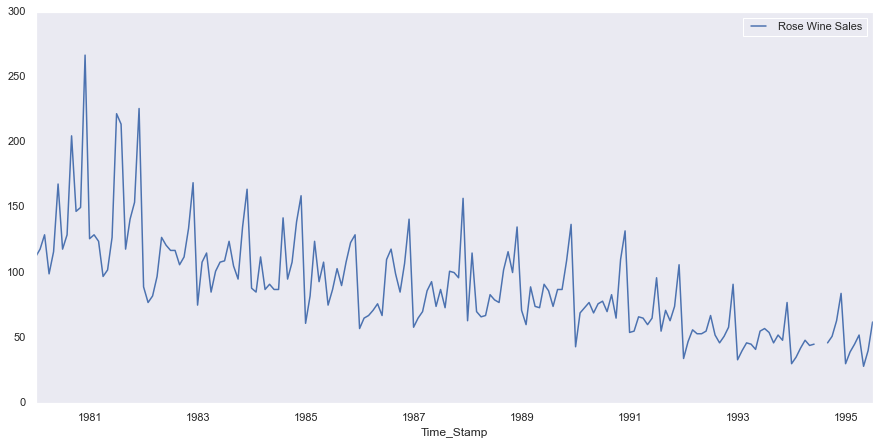

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,7
df.plot();
plt.grid()

<span class="mark">Insights</span>

We can see that there is a downward trend in the series with a seasonal pattern associated as well.Moreover we found that some data is missing from the series too. We will check the missing values and impute them as well by suitable method. 

#### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

##### Exploratory Data Analysis

###### Checking the Summary of the Dataset.

In [15]:
df.describe()

Rose Wine Sales
count       185.000000
mean         90.394595
std          39.175344
min          28.000000
25%          63.000000
50%          86.000000
75%         112.000000
max         267.000000

In [16]:
data_matrix = [['Statistical Summary','Values'],
              ['count' , 185.000000],
              ['mean' , 90.394595 ],
              ['std', 39.175344],
              ['min' , 28.000000],
              ['25%' , 63.000000],
              ['50%' , 86.000000],
              ['75%' , 112.000000],
              ['max' ,267.000000]]
fig = ff.create_table(data_matrix)
fig.show()

<span class="burk">Note</span>

The describe ( ) method computes and displays summary statistics for a Python dataframe.From the above table we can infer the count,mean, std , 25% , 50% ,75% and min & max values of the Sparkling Wine Sales column present in the dataset.

<span class="mark">Insights</span>

Rose Wine Sales ranges from a minimum of 28 to maximum of 267.
Mean of the Rose Wine Sales is around 90.394595.
Standard Deviation of the Rose Wine Sales is 39.175344.
25% , 50% (median) and 75 % of Rose Wine Sales are 63 ,86 and 112.

###### Checking the Appropriateness of Data-types & Information of the Dataframe.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rose Wine Sales  185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [18]:
data_info_table = [['S.No.','Features / Columns','Non-Null Count','Dtype','Memory Usage'],
              [1,' Rose Wine Sales' ,'185 non-null','float64','2.9KB']]
fig = ff.create_table(data_info_table)
fig.show()

<span class="burk">Note</span>

The info( ) function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index d-type and column d-types, non-null values and memory usage.

<span class="mark">Insights</span>

From the above results we can see that there is 2 null values present in the dataset.Their are total 187 entries of Rose wines Sales as per Monthly frequency in this dataset,indexed from 1980-01-31 to 1995-07-31.Rose Wine Sales column have d-type of float64. Memory used by the dataset: 2.9 KB.

###### Checking the Null Values in the Dataset.

In [19]:
df.isnull().sum()

Rose Wine Sales    2
dtype: int64

In [20]:
null_check_table = [['S.No.','Features / Columns','Null Count'],
              [1,'Rose Wine Sales' ,2]]
fig = ff.create_table(null_check_table)
fig.show()

<span class="mark">Insights</span>

There is 2 Null Values Present in the Dataset.So we need to impute the missing value present in the data with some meaningful value by using suitable null value imputation method.

In [21]:
df['1994'].head(12)

Rose Wine Sales
Time_Stamp                 
1994-01-31             30.0
1994-02-28             35.0
1994-03-31             42.0
1994-04-30             48.0
1994-05-31             44.0
1994-06-30             45.0
1994-07-31              NaN
1994-08-31              NaN
1994-09-30             46.0
1994-10-31             51.0
1994-11-30             63.0
1994-12-31             84.0

###### Filling the Null Values 

In [22]:
df["1994"].fillna(method="ffill",inplace=True) #Using Forward Fillna Method

###### Checking the Null Values Again

In [23]:
df["Rose Wine Sales"].isnull().sum()

0

In [24]:
df['1994']

Rose Wine Sales
Time_Stamp                 
1994-01-31             30.0
1994-02-28             35.0
1994-03-31             42.0
1994-04-30             48.0
1994-05-31             44.0
1994-06-30             45.0
1994-07-31             45.0
1994-08-31             45.0
1994-09-30             46.0
1994-10-31             51.0
1994-11-30             63.0
1994-12-31             84.0

<span class="girk">Result</span>

We successfully impute the null values by forward fillna method. Now we donot have any null values in the data.

###### Checking the Shape of the Dataframe.

In [25]:
df.shape

(187, 1)

<span class="burk">Note</span>

Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data.

In [26]:
shape = [['No. of Rows', 'No. of Columns'],
        [187 , 1]]
table = ff.create_table(shape)
table

<span class="mark">Insights</span>

The Rose.csv data set has 187 observations (rows) and 1 variable (column named as Rose Wine Sales) in the dataset.

##### Data Visualization of the Time Series

###### Year on Year boxplot for the Rose Wine Sales.

A box-plot gives a nice summary of one or several numeric variables. The line that divides the box into 2 parts represents the median of the data. The end of the box shows the upper and lower quartiles. The extreme lines show the highest and lowest value excluding outliers.

Now, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers in each year, if any.

Text(0, 0.5, 'Yearly  Rose Wine Sales Variation')

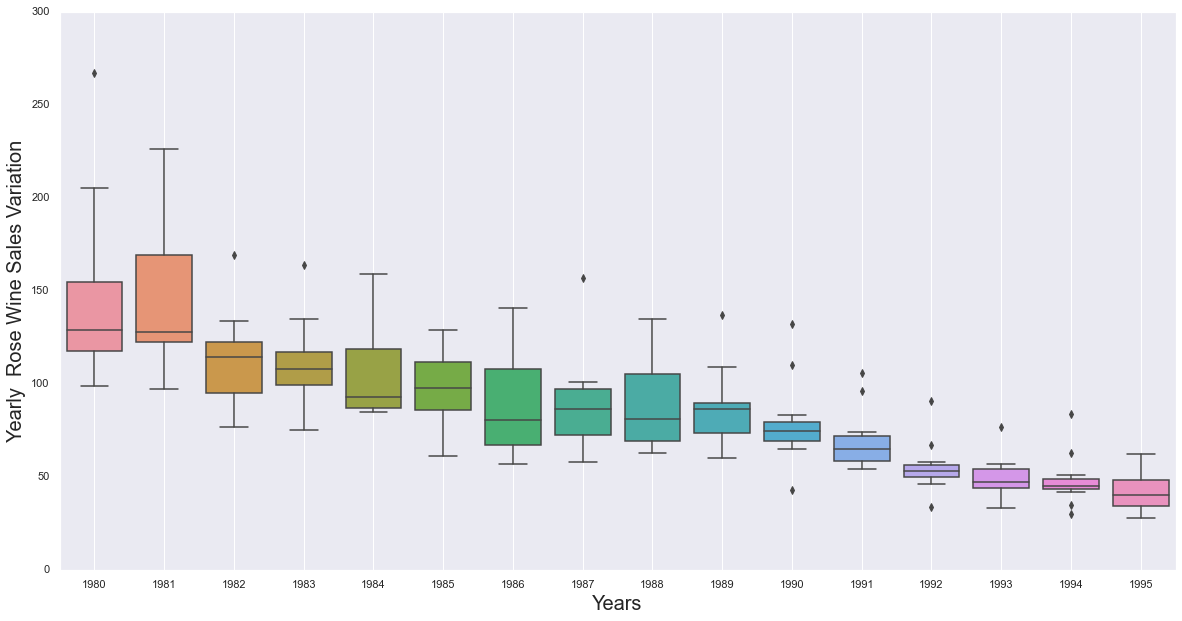

In [27]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(df.index.year, df["Rose Wine Sales"],whis=1.5)
plt.grid();
ax.set_xlabel('Years', fontsize = 20)
ax.set_ylabel('Yearly  Rose Wine Sales Variation', fontsize = 20)

<span class="mark">Insights</span>

* As we got to know from the Time Series plot, the box-plots over here also indicates a measure of trend being present. Also, we see that the Rose Wine Sales have outliers for the years.The yearly boxplots also shows that the Sales have decreased year after year.

* Box-plot of Year 1980 and 1981 have max median value,from this we can clearly infer that year 1981 have maximum Rose Wine Sales.

* Box-plot of Year 1995 have min median value,we can clearly infer that year 1995 have minimum Rose Wine Sales.

###### Monthly Box-Plot for the Rose Wine Sales Taking all the Years into Account

Text(0, 0.5, 'Monthly Rose Wine Sales Variation')

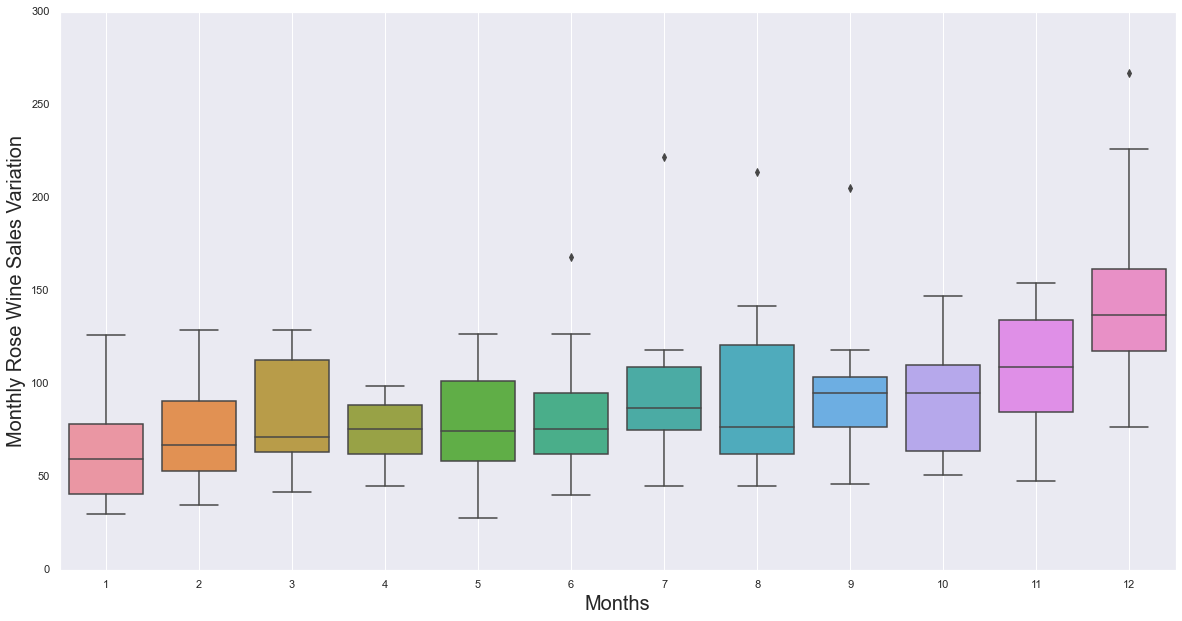

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(df.index.month, df["Rose Wine Sales"],whis=1.5)
plt.grid();
ax.set_xlabel('Months', fontsize = 20)
ax.set_ylabel('Monthly Rose Wine Sales Variation', fontsize = 20)

<span class="mark">Insights</span>

* The Box-Plots for the monthly Rose Wine Sales for different years very few outliers in the month 6 , 7, 8,9 and 12 show outliers , rest doesn't show any outliers.

* From September to December the Rose Wine Sales increasing , so this the period where the Rose Wine Sales is highest.

* December is the month of highest Rose Wine Sales every year. 

* There is seasonality also every year from September to December the Rose Wine Sales increasing.

###### Monthplot of Rose Wine Sales Time Series

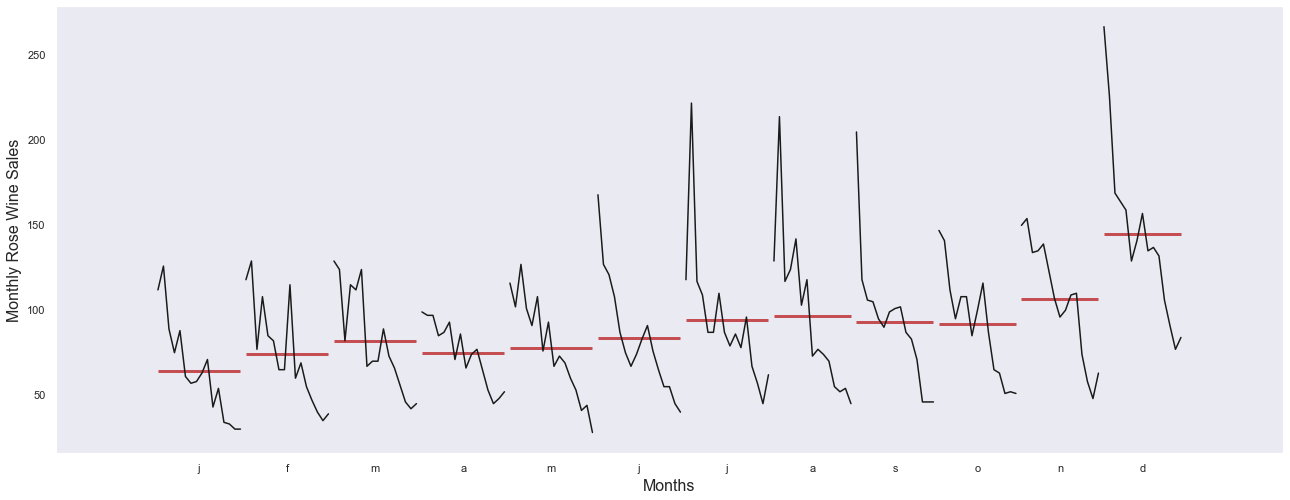

In [29]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))
month_plot(df, ylabel="Rose Wine Sales",ax=ax)
ax.set_xlabel('Months', fontsize = 16)
ax.set_ylabel('Monthly Rose Wine Sales', fontsize = 16)
plt.grid();

<span class="burk">Note</span>

This plot shows the variations of the Rose Wine Sales values across the months & this red line is the mean value of the Rose Wine Sales for every month.

<span class="mark">Insights</span>

* As noticed in the above box-plot we get same result from here too. From September to December Rose Wine Sales goes on increasing.

* December month have the highest sales of the Rose Wine while Jan month have low sales of the Rose Wine.

###### Time Series Plot for different months for different years.

In [30]:
yearly_sales_across_months= pd.pivot_table(df, values='Rose Wine Sales', columns= df.index.month, index=df.index.year)
yearly_sales_across_months

Time_Stamp     1      2      3     4      5      6      7      8      9   \
Time_Stamp                                                                 
1980        112.0  118.0  129.0  99.0  116.0  168.0  118.0  129.0  205.0   
1981        126.0  129.0  124.0  97.0  102.0  127.0  222.0  214.0  118.0   
1982         89.0   77.0   82.0  97.0  127.0  121.0  117.0  117.0  106.0   
1983         75.0  108.0  115.0  85.0  101.0  108.0  109.0  124.0  105.0   
1984         88.0   85.0  112.0  87.0   91.0   87.0   87.0  142.0   95.0   
1985         61.0   82.0  124.0  93.0  108.0   75.0   87.0  103.0   90.0   
1986         57.0   65.0   67.0  71.0   76.0   67.0  110.0  118.0   99.0   
1987         58.0   65.0   70.0  86.0   93.0   74.0   87.0   73.0  101.0   
1988         63.0  115.0   70.0  66.0   67.0   83.0   79.0   77.0  102.0   
1989         71.0   60.0   89.0  74.0   73.0   91.0   86.0   74.0   87.0   
1990         43.0   69.0   73.0  77.0   69.0   76.0   78.0   70.0   83.0   
1991         54.0   55.0   66.0  65.0   60.0   65.0   96.0   55.0   71.0   
1992         34.0   47.0   56.0  53.0   53.0   55.0   67.0   52.0   46.0   
1993         33.0   40.0   46.0  45.0   41.0   55.0   57.0   54.0   46.0   
1994         30.0   35.0   42.0  48.0   44.0   45.0   45.0   45.0   46.0   
1995         30.0   39.0   45.0  52.0   28.0   40.0   62.0    NaN    NaN   

Time_Stamp     10     11     12  
Time_Stamp                       
1980        147.0  150.0  267.0  
1981        141.0  154.0  226.0  
1982        112.0  134.0  169.0  
1983         95.0  135.0  164.0  
1984        108.0  139.0  159.0  
1985        108.0  123.0  129.0  
1986         85.0  107.0  141.0  
1987        100.0   96.0  157.0  
1988        116.0  100.0  135.0  
1989         87.0  109.0  137.0  
1990         65.0  110.0  132.0  
1991         63.0   74.0  106.0  
1992         51.0   58.0   91.0  
1993         52.0   48.0   77.0  
1994         51.0   63.0   84.0  
1995          NaN    NaN    NaN

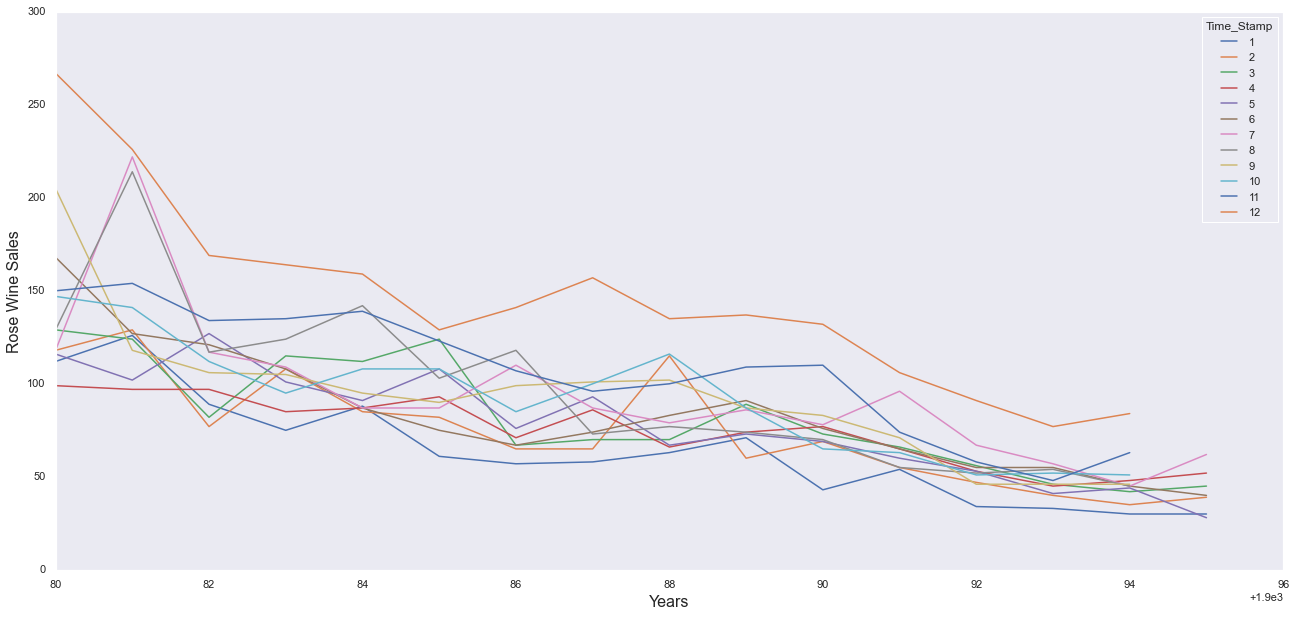

In [31]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
ax.set_xlabel('Years', fontsize = 16)
ax.set_ylabel('Rose Wine Sales', fontsize = 16)
plt.grid();

<span class="burk">Note</span>

This plot gives us information about the monthly trend across the years.Here in this plot every line is a month tells us about the sales of Rose Wines of each month across the year.This is way to show year on year monthly trend.

<span class="mark">Insights</span>

* From the above plot we clearly infer that December month have highest sales of Rose Wine.

* Jan month have the lowest sales of the Rose Wine.

##### Decomposition of the Time Series

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

###### Additive Decomposition Model

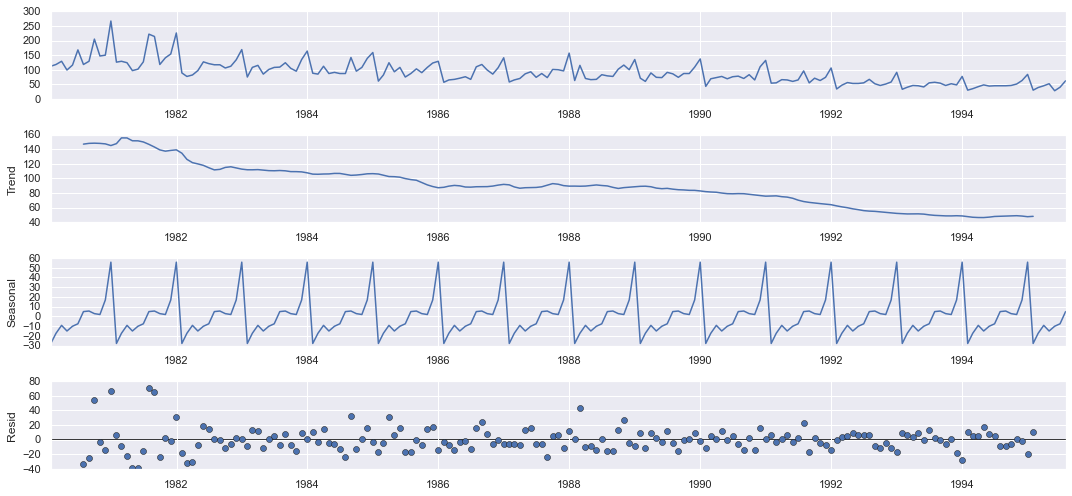

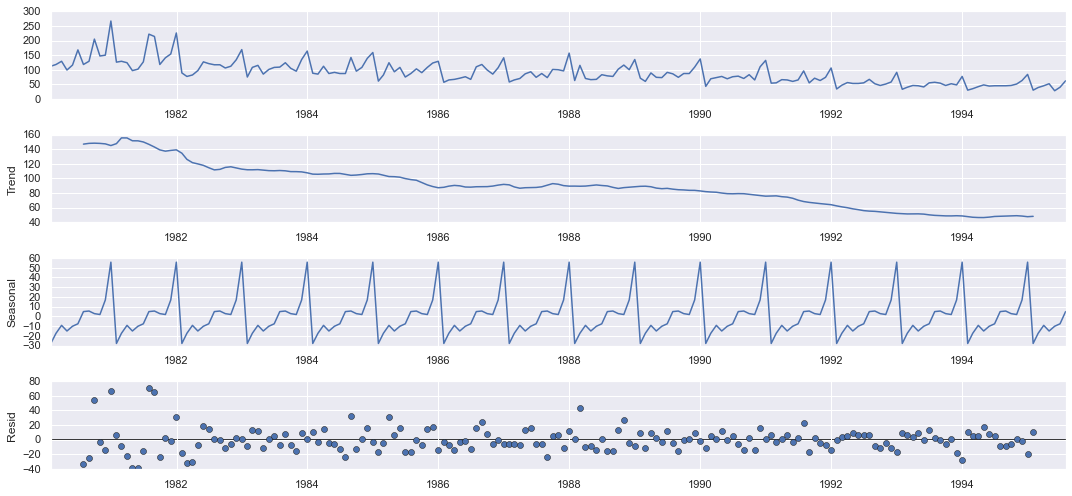

In [33]:
decomposition= seasonal_decompose(df,model='additive')
decomposition.plot()

<span class="burk">Insights</span>

* As per the 'Additive' Decomposition Model, we see that there is a down-trend in the years of the data. There is a seasonality as well.

* Errors are not randomly distributed ,showing some kind of pattern.

* We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

* Even the peaks of the original time series is not constant having change in the values.

###### Values for Trend , Seasonality & Residuals of Additive Decomposition Model

In [34]:
trend= decomposition.trend
seasonality= decomposition.seasonal
residual= decomposition.resid

In [35]:
print('Trend','\n',trend.head(24),'\n')
print('Seasonality','\n',seasonality.head(24),'\n')
print('Residual','\n',residual.head(24),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
1981-01-31    147.750000
1981-02-28    155.625000
1981-03-31    155.541667
1981-04-30    151.666667
1981-05-31    151.583333
1981-06-30    150.041667
1981-07-31    146.791667
1981-08-31    143.083333
1981-09-30    139.166667
1981-10-31    137.416667
1981-11-30    138.458333
1981-12-31    139.250000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.903092
1980-02-29   -17.431663
1980-03-31    -9.279878
1980-04-30   -15.092378
1980-05-31   -10.190592
1980-06-30    -7.672735
1980-07-31     4.880241
1980-08-31     5.460797
1980-09-30     2.780241
1980-10-31     1.877464
1980-11-30    16.852464
1980-12-31    55.719130
1981-01-31   -27.903092
1981-02-28   -

###### Multiplicative Decomposition Model

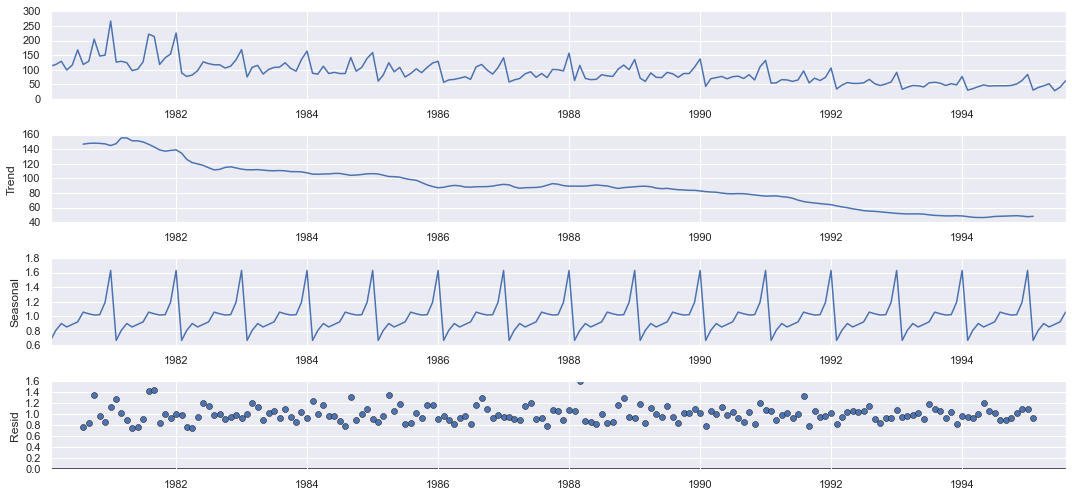

In [36]:
decomposition= seasonal_decompose(df,model='multiplicative')
decomposition.plot();

<span class="mark">Insights</span>

* As per the 'Multiplicative' Decomposition Model, we see that there is a pronounced down-trend in the years of the data. There is a seasonality as well.

* For the multiplicative series, we see that residuals are located around 1.

###### Values for Trend , Seasonality & Residuals of Multplicative Decomposition Model

In [37]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670182
1980-02-29    0.806224
1980-03-31    0.901278
1980-04-30    0.854154
1980-05-31    0.889531
1980-06-30    0.924099
1980-07-31    1.057682
1980-08-31    1.035066
1980-09-30    1.017753
1980-10-31    1.022688
1980-11-30    1.192494
1980-12-31    1.628848
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758514
1980-08-31    0.841382
1980-09-30    1.357534
1980-10-31    0.970661
1980-11-30    0.853274
1980-12-31    1.129506
Name: resid, dtype:

#### 3. Split the data into training and test. The test data should start in 1991.

##### Spliting of the data into Train and Test.

<span class="burk">Note</span>

Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [38]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

##### Checking the Records of the Train & Test Data.

In [39]:
## This is to display multiple data frames from one cell
from IPython.display import display
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose Wine Sales
Time_Stamp                 
1980-01-31            112.0
1980-02-29            118.0
1980-03-31            129.0
1980-04-30             99.0
1980-05-31            116.0

Last few rows of Training Data


Rose Wine Sales
Time_Stamp                 
1990-08-31             70.0
1990-09-30             83.0
1990-10-31             65.0
1990-11-30            110.0
1990-12-31            132.0

First few rows of Test Data


Rose Wine Sales
Time_Stamp                 
1991-01-31             54.0
1991-02-28             55.0
1991-03-31             66.0
1991-04-30             65.0
1991-05-31             60.0

Last few rows of Test Data


Rose Wine Sales
Time_Stamp                 
1995-03-31             45.0
1995-04-30             52.0
1995-05-31             28.0
1995-06-30             40.0
1995-07-31             62.0

##### Checking the Shape of the Train & Test Data.

<span class="burk">Note</span>

Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data.

In [40]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [41]:
shape_train = [['No. of Rows', 'No. of Columns'],
        [132 , 1]]
table = ff.create_table(shape_train)
table
      

In [42]:
shape_test = [['No. of Rows', 'No. of Columns'],
        [55 , 1]]
table = ff.create_table(shape_test)
table

###### Plot of Train & Test Data.

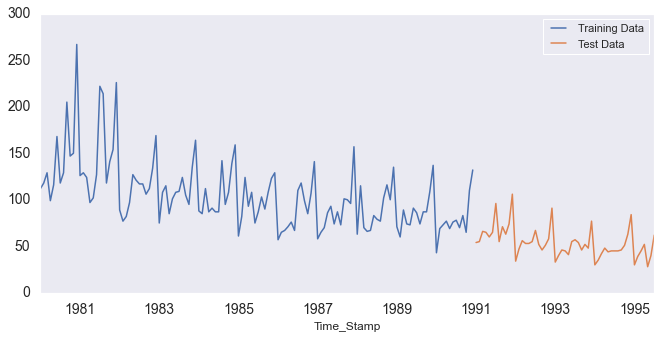

In [43]:
train['Rose Wine Sales'].plot(figsize=(11,5), fontsize=14)
test['Rose Wine Sales'].plot(figsize=(11,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

<span class="mark">Insights</span>

* Blue color represents the train data ,training Data is till the end of 1990.

* Orange color represents the test data ,test Data is from the beginning of 1991 to the last time stamp provided.

#### 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.


##### Model 1: Linear Regression

<span class="burk">Note</span>

For this particular linear regression, we are going to regress the 'Rose Wine Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [44]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


<span class="burk">Note</span>

We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [45]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [46]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Rose Wine Sales  time
Time_Stamp                       
1980-01-31            112.0     1
1980-02-29            118.0     2
1980-03-31            129.0     3
1980-04-30             99.0     4
1980-05-31            116.0     5 

Last few rows of Training Data 
             Rose Wine Sales  time
Time_Stamp                       
1990-08-31             70.0   128
1990-09-30             83.0   129
1990-10-31             65.0   130
1990-11-30            110.0   131
1990-12-31            132.0   132 

First few rows of Test Data 
             Rose Wine Sales  time
Time_Stamp                       
1991-01-31             54.0   133
1991-02-28             55.0   134
1991-03-31             66.0   135
1991-04-30             65.0   136
1991-05-31             60.0   137 

Last few rows of Test Data 
             Rose Wine Sales  time
Time_Stamp                       
1995-03-31             45.0   183
1995-04-30             52.0   184
1995-05-31        

<span class="burk">Note</span>

Now that our training and test data has been modified, let us go ahead use Linear Regression to build the model on the training data and test the model on the test data.

###### Building Linear Regression Model

In [47]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [48]:
lr.fit(LinearRegression_train[['time']], LinearRegression_train['Rose Wine Sales'].values)

LinearRegression()

In [49]:
LinearRegression_train['Rose Wine Sales'].values

array([112., 118., 129.,  99., 116., 168., 118., 129., 205., 147., 150.,
       267., 126., 129., 124.,  97., 102., 127., 222., 214., 118., 141.,
       154., 226.,  89.,  77.,  82.,  97., 127., 121., 117., 117., 106.,
       112., 134., 169.,  75., 108., 115.,  85., 101., 108., 109., 124.,
       105.,  95., 135., 164.,  88.,  85., 112.,  87.,  91.,  87.,  87.,
       142.,  95., 108., 139., 159.,  61.,  82., 124.,  93., 108.,  75.,
        87., 103.,  90., 108., 123., 129.,  57.,  65.,  67.,  71.,  76.,
        67., 110., 118.,  99.,  85., 107., 141.,  58.,  65.,  70.,  86.,
        93.,  74.,  87.,  73., 101., 100.,  96., 157.,  63., 115.,  70.,
        66.,  67.,  83.,  79.,  77., 102., 116., 100., 135.,  71.,  60.,
        89.,  74.,  73.,  91.,  86.,  74.,  87.,  87., 109., 137.,  43.,
        69.,  73.,  77.,  69.,  76.,  78.,  70.,  83.,  65., 110., 132.])

###### Prediction on Test Dataset

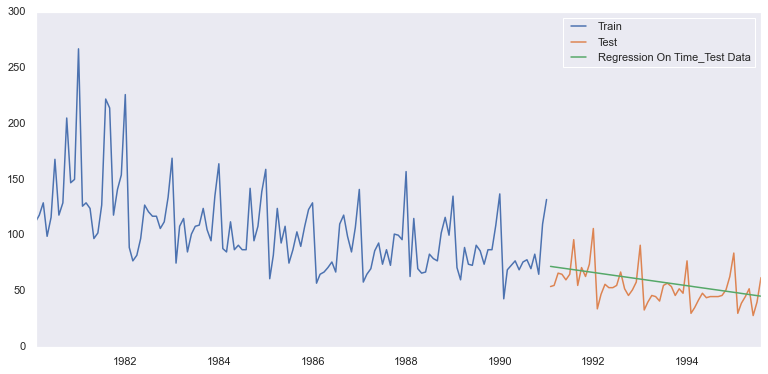

In [50]:
test_prediction_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime']= test_prediction_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose Wine Sales'], label='Train')
plt.plot(test['Rose Wine Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

<span class="girk">Observation</span>

Here we get a linear line following the previous patterns.

###### Model Evaluation Linear Regression

In [51]:
from sklearn import metrics

**Test Data - RMSE**

In [52]:
rmse_model1_test= metrics.mean_squared_error(test['Rose Wine Sales'],test_prediction_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.276


In [53]:
model_results_df_1 = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Regression On Time'])
model_results_df_1

Test RMSE
Regression On Time  15.275732

##### Model 2: Naive Model , { Navie Approach: ^yt+1=yt }

<span class="burk">Note</span>

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

###### Building Navie Model

In [54]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [55]:
NaiveModel_test['naive'] = np.asarray(train['Rose Wine Sales'])[len(np.asarray(train['Rose Wine Sales']))-1]
NaiveModel_test['naive'].head(12)

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
1991-06-30    132.0
1991-07-31    132.0
1991-08-31    132.0
1991-09-30    132.0
1991-10-31    132.0
1991-11-30    132.0
1991-12-31    132.0
Name: naive, dtype: float64

###### Prediction on Test Dataset

In [56]:
NaiveModel_test.head()

Rose Wine Sales  naive
Time_Stamp                        
1991-01-31             54.0  132.0
1991-02-28             55.0  132.0
1991-03-31             66.0  132.0
1991-04-30             65.0  132.0
1991-05-31             60.0  132.0

<span class="girk">Observation</span>

We get the same value of Navie forecast for the entire test data.

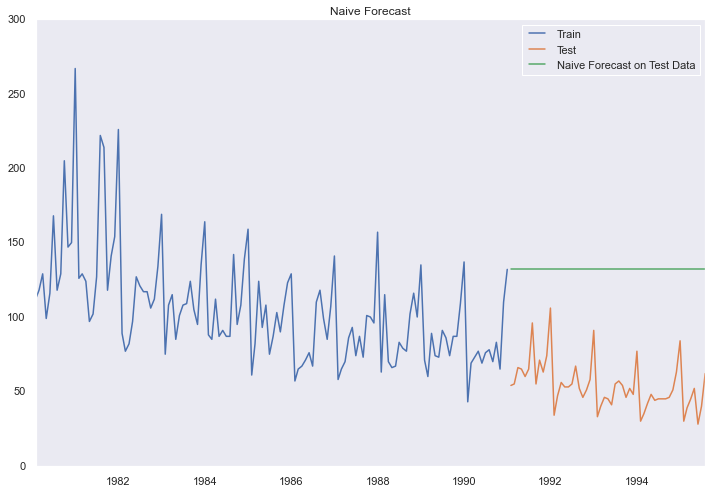

In [57]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose Wine Sales'], label='Train')
plt.plot(test['Rose Wine Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

<span class="burk">Observation</span>

The last observation of the train data is constructed the forecast for entire test data.That's why we are seeing a straight line here. i.e. The Rose Wine Sales will be like the recent past.

###### Model Evaluation Navie

**Test Data - RMSE**

In [58]:
rmse_model2_test = metrics.mean_squared_error(test['Rose Wine Sales'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.739


In [59]:
model_results_df_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])

Model_Results_Df = pd.concat([model_results_df_1, model_results_df_2])
Model_Results_Df

Test RMSE
Regression On Time  15.275732
Naive Model         79.738550

##### Model 3 : Simple Average Model

<span class="burk">Note</span>

For this particular simple average method, we will forecast by using the average of the training values.

###### Building Simple Average Model

In [60]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [61]:
SimpleAverage_test['mean_forecast']= train['Rose Wine Sales'].mean()
SimpleAverage_test.head()

Rose Wine Sales  mean_forecast
Time_Stamp                                
1991-01-31             54.0     104.939394
1991-02-28             55.0     104.939394
1991-03-31             66.0     104.939394
1991-04-30             65.0     104.939394
1991-05-31             60.0     104.939394

###### Prediction on Test Dataset.

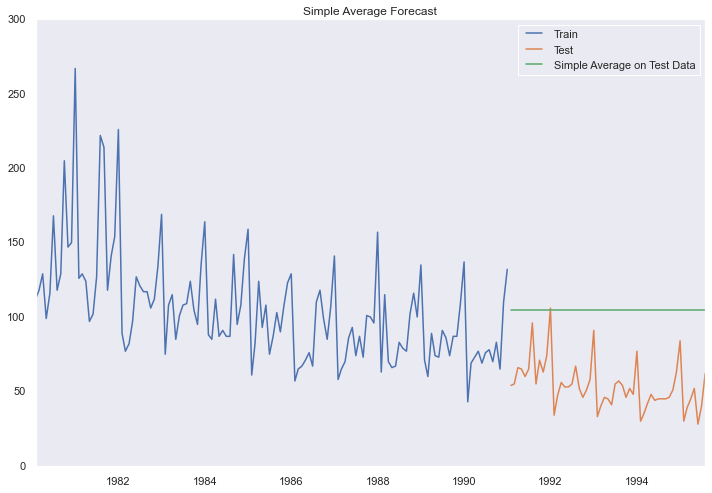

In [62]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose Wine Sales'], label='Train')
plt.plot(SimpleAverage_test['Rose Wine Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();


###### Model Evaluation Simple Average

**Test Data - RMSE**

In [63]:
rmse_model3_test = metrics.mean_squared_error(test['Rose Wine Sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.481


In [64]:
model_results_df_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

Model_Results_Df = pd.concat([Model_Results_Df, model_results_df_3 ])
Model_Results_Df

Test RMSE
Regression On Time    15.275732
Naive Model           79.738550
Simple Average Model  53.480857

##### Model 4 : Moving Average(MA)

<span class="burk">Note</span>

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### Building Moving Average Model

In [65]:
MovingAverage = df.copy()
MovingAverage.head()

Rose Wine Sales
Time_Stamp                 
1980-01-31            112.0
1980-02-29            118.0
1980-03-31            129.0
1980-04-30             99.0
1980-05-31            116.0

**Trailing moving averages**

In [66]:
MovingAverage['Trailing_2']= MovingAverage['Rose Wine Sales'].rolling(2).mean()
MovingAverage['Trailing_4']= MovingAverage['Rose Wine Sales'].rolling(4).mean()
MovingAverage['Trailing_6']= MovingAverage['Rose Wine Sales'].rolling(6).mean()
MovingAverage['Trailing_9']= MovingAverage['Rose Wine Sales'].rolling(9).mean()

MovingAverage.head()

Rose Wine Sales  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                                 
1980-01-31            112.0         NaN         NaN         NaN         NaN
1980-02-29            118.0       115.0         NaN         NaN         NaN
1980-03-31            129.0       123.5         NaN         NaN         NaN
1980-04-30             99.0       114.0       114.5         NaN         NaN
1980-05-31            116.0       107.5       115.5         NaN         NaN

**Plotting of the Whole Data With Moving Average**

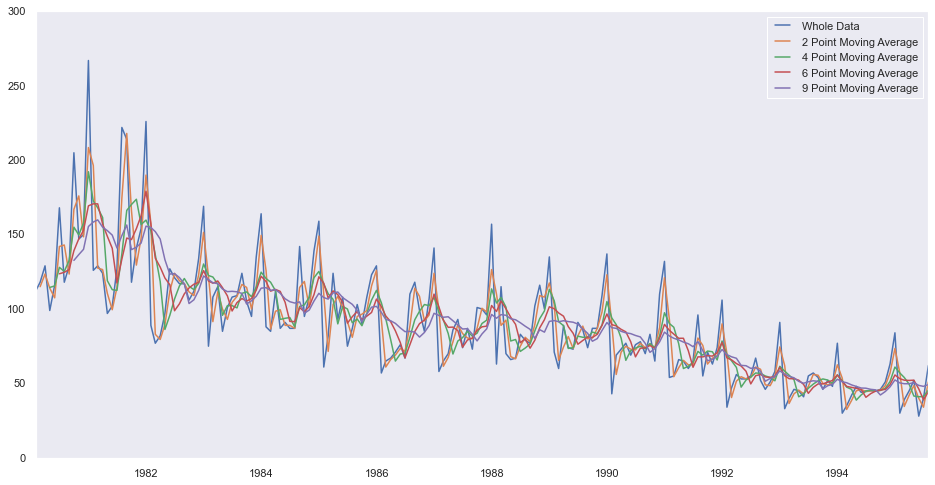

In [67]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose Wine Sales'], label='Whole Data')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

<span class="girk">Observation</span>

2 Point Moving Average curve is copying the original data as it is replicating the original data.

<span class="burk">Note</span>

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

**Creating Train and Test Set For Moving Average Model**

In [68]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

**Plotting on both the Training and Test data**

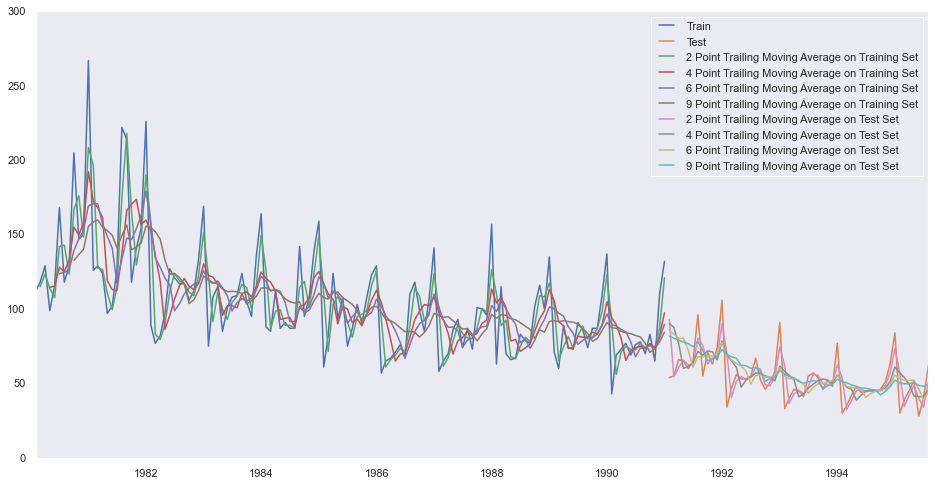

In [69]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose Wine Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose Wine Sales'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

###### Model Evaluation Moving Average

<span class="burk">Note</span>

Done only on the Test Data.

**Test Data - RMSE With Moving Averages**

In [70]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose Wine Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose Wine Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose Wine Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose Wine Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 14.455
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 14.572
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 14.731 


<span class="girk">Observation</span>

RMSE of the 2 Point Moving Average Model is the least - 11.529 among the 4 , 6 , 9 Point Moving Average Model.

In [71]:
model_results_df_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2 Point Trailing Moving Average','4 Point Trailing Moving Average'
                                   ,'6 PointTrailing Moving Average','9 PointTrailing Moving Average'])

Model_Results_Df = pd.concat([Model_Results_Df, model_results_df_4])
Model_Results_Df

Test RMSE
Regression On Time               15.275732
Naive Model                      79.738550
Simple Average Model             53.480857
2 Point Trailing Moving Average  11.529409
4 Point Trailing Moving Average  14.455221
6 PointTrailing Moving Average   14.572009
9 PointTrailing Moving Average   14.731209

##### Model 5 : Simple Exponential Smoothing Model

###### Building Simple Exponential Smoothing Model

In [72]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from warnings import filterwarnings
filterwarnings("ignore")

In [73]:
SES_train = train.copy()
SES_test = test.copy()

In [74]:
model_SES= SimpleExpSmoothing(SES_train['Rose Wine Sales'])

In [75]:
model_SES_autofit= model_SES.fit(optimized=True) #autofit method

In [76]:
model_SES_autofit.params

{'smoothing_level': 0.09874989207824814,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.3869755697016,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

###### Prediction on Test Dataset.

In [77]:
SES_test['predict']= model_SES_autofit.forecast(steps= len(test))
SES_test.head()

Rose Wine Sales    predict
Time_Stamp                            
1991-01-31             54.0  87.104999
1991-02-28             55.0  87.104999
1991-03-31             66.0  87.104999
1991-04-30             65.0  87.104999
1991-05-31             60.0  87.104999

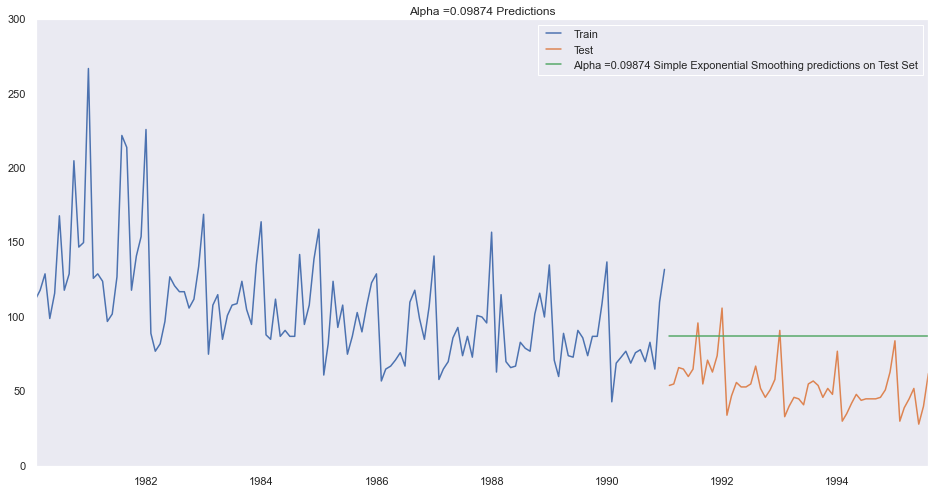

In [78]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose Wine Sales'], label='Train')
plt.plot(SES_test['Rose Wine Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.09874 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.09874 Predictions');


###### Model Evaluation for α= 0.09874 : Simple Exponential Smoothing

**Test Data - RMSE**

In [79]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose Wine Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.09874 Simple Exponential Smoothing Model forecast on the Test Data, RMSE  is %3.3f" %(rmse_model5_test_1))

For Alpha =0.09874 Simple Exponential Smoothing Model forecast on the Test Data, RMSE  is 36.817


In [80]:
model_results_df_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.09874,Simple Exponential Smoothing'])

Model_Results_Df = pd.concat([Model_Results_Df, model_results_df_5])
Model_Results_Df

Test RMSE
Regression On Time                          15.275732
Naive Model                                 79.738550
Simple Average Model                        53.480857
2 Point Trailing Moving Average             11.529409
4 Point Trailing Moving Average             14.455221
6 PointTrailing Moving Average              14.572009
9 PointTrailing Moving Average              14.731209
Alpha=0.09874,Simple Exponential Smoothing  36.816904

###### Setting different alpha values - Brute Force Method

<span class="burk">Note</span>

Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.

We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [81]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_ses = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_ses

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [82]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose Wine Sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose Wine Sales'],SES_test['predict',i],squared=False)
    
    resultsDf_ses = resultsDf_ses.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [83]:
resultsDf_ses.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
0           0.3   32.470164  47.525251
1           0.4   33.035130  53.787686
2           0.5   33.682839  59.661932
3           0.6   34.441171  64.991324
4           0.7   35.323261  69.718108
5           0.8   36.334596  73.793865
6           0.9   37.482782  77.159094

<span class="mark">Insights</span>

Here after comparing different alpha values we get the least RMSE on Test data at alpha=0.3.So, we can take alpha=0.3 for the model.

###### Model Evaluation

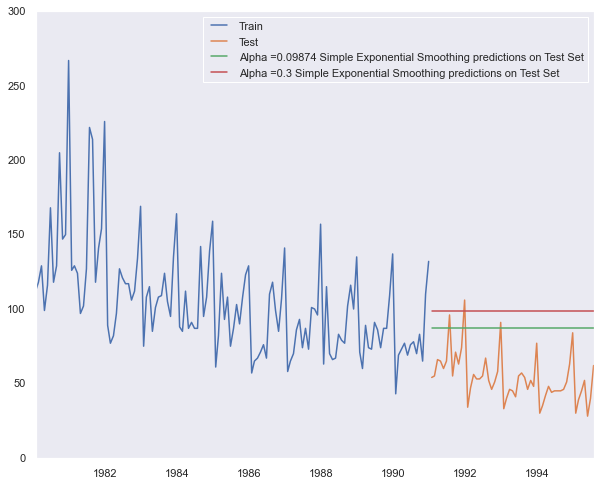

In [84]:
## Plotting on both the Training and Test data

plt.figure(figsize=(10,8))
plt.plot(SES_train['Rose Wine Sales'], label='Train')
plt.plot(SES_test['Rose Wine Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.09874 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

**Test Data - RMSE With Alpha = 0.3**

In [85]:
model_resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_ses.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.3,Simple Exponential Smoothing'])

Model_Results_Df = pd.concat([Model_Results_Df, model_resultsDf_6_1])
Model_Results_Df

Test RMSE
Regression On Time                          15.275732
Naive Model                                 79.738550
Simple Average Model                        53.480857
2 Point Trailing Moving Average             11.529409
4 Point Trailing Moving Average             14.455221
6 PointTrailing Moving Average              14.572009
9 PointTrailing Moving Average              14.731209
Alpha=0.09874,Simple Exponential Smoothing  36.816904
Alpha=0.3,Simple Exponential Smoothing      47.525251

##### Model 6 : Double Exponential Smoothing (Holt's Model)

<span class="burk">Note</span>

Two parameters α and β are estimated in this model. Level and Trend are accounted for in this model.

###### Building Double Exponential Smoothing Model (Holt's Model)

In [86]:
DES_train = train.copy()
DES_test = test.copy()

In [87]:
model_DES = Holt(DES_train['Rose Wine Sales'])

###### Setting different alpha & beta values -Brute Force Method

In [88]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_des = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_des

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [89]:
for i in np.arange(0.3, 1.1, 0.1):
    for j in np.arange(0.3, 1.1, 0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,
                                            smoothing_trend=j,
                                            optimized=False,
                                            use_brute=True)
        DES_train['predict', i, j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict', i, j] = model_DES_alpha_i_j.forecast(steps=55)

        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose Wine Sales'],
                                                       DES_train['predict', i,
                                                                 j],
                                                       squared=False)

        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose Wine Sales'],
                                                      DES_test['predict', i,
                                                               j],
                                                      squared=False)

        resultsDf_des = resultsDf_des.append(
            {
                'Alpha Values': i,
                'Beta Values': j,
                'Train RMSE': rmse_model6_train,
                'Test RMSE': rmse_model6_test
            },
            ignore_index=True)

In [90]:
 resultsDf_des

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.3          0.3   35.944983  265.591922
1            0.3          0.4   37.393239  358.775361
2            0.3          0.5   38.888325  451.834692
3            0.3          0.6   40.280670  536.978631
4            0.3          0.7   41.403518  601.640840
..           ...          ...         ...         ...
59           1.0          0.6   51.831610  801.704637
60           1.0          0.7   54.497039  841.917005
61           1.0          0.8   57.365879  853.989973
62           1.0          0.9   60.474309  834.735365
63           1.0          1.0   63.873454  780.103991

[64 rows x 4 columns]

###### Model Evaluation

**Let us sort the data frame in the ascending ordering of the 'Test RMSE'**

In [91]:
resultsDf_des.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.3          0.3   35.944983  265.591922
8            0.4          0.3   36.749123  339.330850
1            0.3          0.4   37.393239  358.775361
16           0.5          0.3   37.433314  394.296935
24           0.6          0.3   38.348984  439.320331

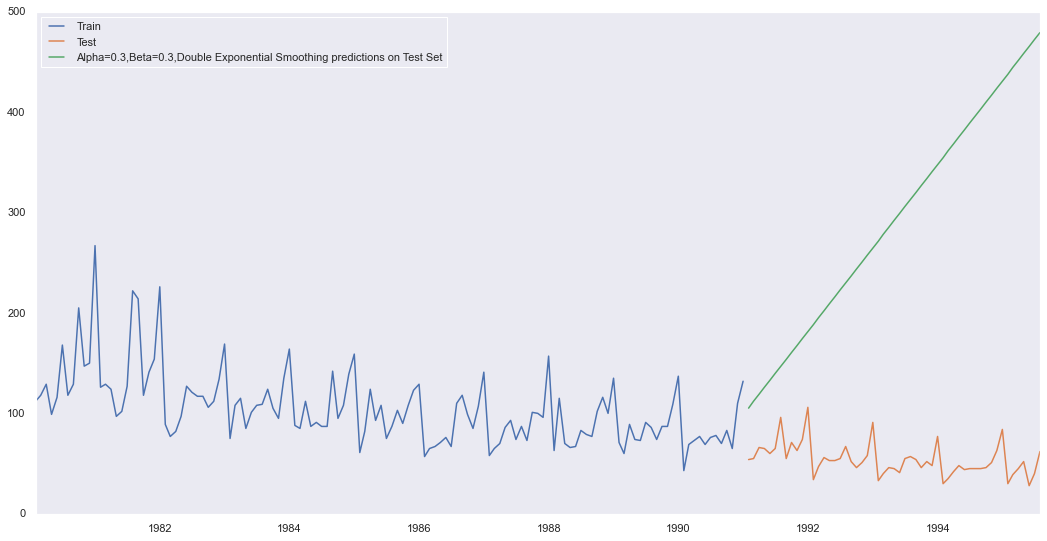

In [92]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose Wine Sales'], label='Train')
plt.plot(DES_test['Rose Wine Sales'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Double Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

**Test Data - RMSE With Alpha = 0.3 & Beta = 0.3**

In [93]:
model_resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_des.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

Model_Results_Df = pd.concat([Model_Results_Df, model_resultsDf_7_1])
Model_Results_Df

Test RMSE
Regression On Time                              15.275732
Naive Model                                     79.738550
Simple Average Model                            53.480857
2 Point Trailing Moving Average                 11.529409
4 Point Trailing Moving Average                 14.455221
6 PointTrailing Moving Average                  14.572009
9 PointTrailing Moving Average                  14.731209
Alpha=0.09874,Simple Exponential Smoothing      36.816904
Alpha=0.3,Simple Exponential Smoothing          47.525251
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing  265.591922

##### Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

<span class="burk">Note</span>

Three parameters α,β and γ are estimated in this model.Level, Trend and Seasonality are accounted for in this model.

###### Building Triple Exponential Smoothing Model (Holt's Winter Model)

In [94]:
TES_train = train.copy()
TES_test = test.copy()

In [95]:
model_TES = ExponentialSmoothing(TES_train['Rose Wine Sales'],trend='additive',seasonal='multiplicative',freq='M')

In [96]:
model_TES_autofit = model_TES.fit() #autofit Method

In [97]:
model_TES_autofit.params

{'smoothing_level': 0.10053559166352141,
 'smoothing_trend': 2.9667113597565187e-06,
 'smoothing_seasonal': 3.752823638129799e-07,
 'damping_trend': nan,
 'initial_level': 49.81115356815166,
 'initial_trend': -0.19155645429914447,
 'initial_seasons': array([2.19563917, 2.47993924, 2.71080105, 2.37691247, 2.66805867,
        2.8714592 , 3.16165653, 3.38100476, 3.16286393, 3.11258111,
        3.61951388, 4.95479995]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

###### Model Evaluation

In [98]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Rose Wine Sales  auto_predict
Time_Stamp                               
1991-01-31             54.0     54.078681
1991-02-28             55.0     60.605971
1991-03-31             66.0     65.728614
1991-04-30             65.0     57.177535
1991-05-31             60.0     63.670076

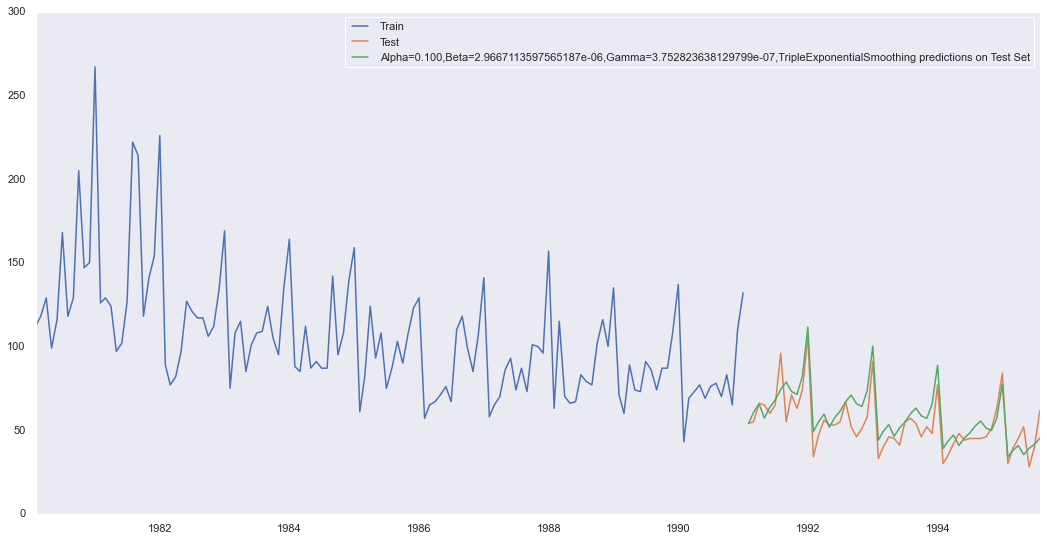

In [99]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose Wine Sales'], label='Train')
plt.plot(TES_test['Rose Wine Sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.100,Beta=2.9667113597565187e-06,Gamma=3.752823638129799e-07,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [100]:
rmse_model6_test_1_tes = metrics.mean_squared_error(TES_test['Rose Wine Sales'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.100,Beta=2.966e-06,Gamma=3.7528e-07, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1_tes))

For Alpha=0.100,Beta=2.966e-06,Gamma=3.7528e-07, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 9.790


In [101]:
model_resultsDf_8_1_tes = pd.DataFrame({'Test RMSE': [rmse_model6_test_1_tes]}
                           ,index=['Alpha=0.100,Beta=2.966e-06,Gamma=3.7528e-07,TripleExponentialSmoothing'])

Model_Results_Df = pd.concat([Model_Results_Df, model_resultsDf_8_1_tes])
Model_Results_Df

Test RMSE
Regression On Time                                   15.275732
Naive Model                                          79.738550
Simple Average Model                                 53.480857
2 Point Trailing Moving Average                      11.529409
4 Point Trailing Moving Average                      14.455221
6 PointTrailing Moving Average                       14.572009
9 PointTrailing Moving Average                       14.731209
Alpha=0.09874,Simple Exponential Smoothing           36.816904
Alpha=0.3,Simple Exponential Smoothing               47.525251
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.591922
Alpha=0.100,Beta=2.966e-06,Gamma=3.7528e-07,Tri...    9.790009

###### Setting different alpha , beta & gamma values

In [102]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_tes = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_tes

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [103]:
for i in np.arange(0.3, 1.1, 0.1):
    for j in np.arange(0.3, 1.1, 0.1):
        for k in np.arange(0.3, 1.1, 0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,
                                                  smoothing_trend=j,
                                                  smoothing_seasonal=k,
                                                  optimized=False,
                                                  use_brute=True)
            TES_train['predict', i, j, k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict', i, j,
                     k] = model_TES_alpha_i_j_k.forecast(steps=55)

            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose Wine Sales'],
                                                           TES_train['predict',
                                                                     i, j, k],
                                                           squared=False)

            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose Wine Sales'],
                                                          TES_test['predict',
                                                                   i, j, k],
                                                          squared=False)

            resultsDf_tes = resultsDf_tes.append(
                {
                    'Alpha Values': i,
                    'Beta Values': j,
                    'Gamma Values': k,
                    'Train RMSE': rmse_model8_train,
                    'Test RMSE': rmse_model8_test
                },
                ignore_index=True)

In [104]:
resultsDf_tes

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE
0             0.3          0.3           0.3     27.217969     19.074245
1             0.3          0.3           0.4     27.399095     11.185630
2             0.3          0.3           0.5     27.928512     30.542692
3             0.3          0.3           0.6     28.888611     63.601214
4             0.3          0.3           0.7     30.568635    122.452533
..            ...          ...           ...           ...           ...
507           1.0          1.0           0.6  28358.458519   9603.639171
508           1.0          1.0           0.7  30724.126331  23029.955433
509           1.0          1.0           0.8   1218.755446   9626.707516
510           1.0          1.0           0.9  14150.253251   9691.904819
511           1.0          1.0           1.0   1768.254189   8138.615771

[512 rows x 5 columns]

In [105]:
resultsDf_tes.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
8             0.3          0.4           0.3   28.111886  10.951007
1             0.3          0.3           0.4   27.399095  11.185630
69            0.4          0.3           0.8   32.601491  12.613096
16            0.3          0.5           0.3   29.087520  14.395909
131           0.5          0.3           0.6   32.144773  16.703934

###### Model Evaluation

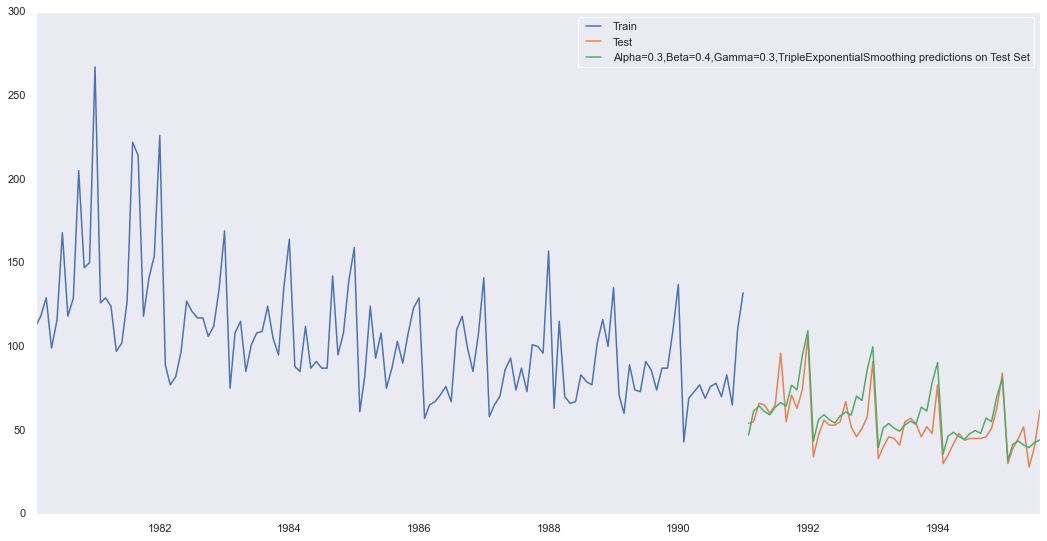

In [106]:
plt.figure(figsize=(18, 9))
plt.plot(TES_train['Rose Wine Sales'], label='Train')
plt.plot(TES_test['Rose Wine Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(
    TES_test['predict', 0.3, 0.4, 0.3],
    label=
    'Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set'
)

plt.legend(loc='best')
plt.grid()


In [107]:
model_resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_tes.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing'])

Model_Results_Df = pd.concat([Model_Results_Df, model_resultsDf_8_3])
Model_Results_Df

Test RMSE
Regression On Time                                   15.275732
Naive Model                                          79.738550
Simple Average Model                                 53.480857
2 Point Trailing Moving Average                      11.529409
4 Point Trailing Moving Average                      14.455221
6 PointTrailing Moving Average                       14.572009
9 PointTrailing Moving Average                       14.731209
Alpha=0.09874,Simple Exponential Smoothing           36.816904
Alpha=0.3,Simple Exponential Smoothing               47.525251
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.591922
Alpha=0.100,Beta=2.966e-06,Gamma=3.7528e-07,Tri...    9.790009
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...   10.951007

#### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

##### Check for stationarity of the whole Time Series data. - Dickey-Fuller test

In [108]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=12).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

In [109]:
print(adfuller(df['Rose Wine Sales'], autolag='AIC'))

(-1.8748555417199952, 0.3439807193343013, 13, 173, {'1%': -3.4687256239864017, '5%': -2.8783961376954363, '10%': -2.57575634100705}, 1516.3098240664704)


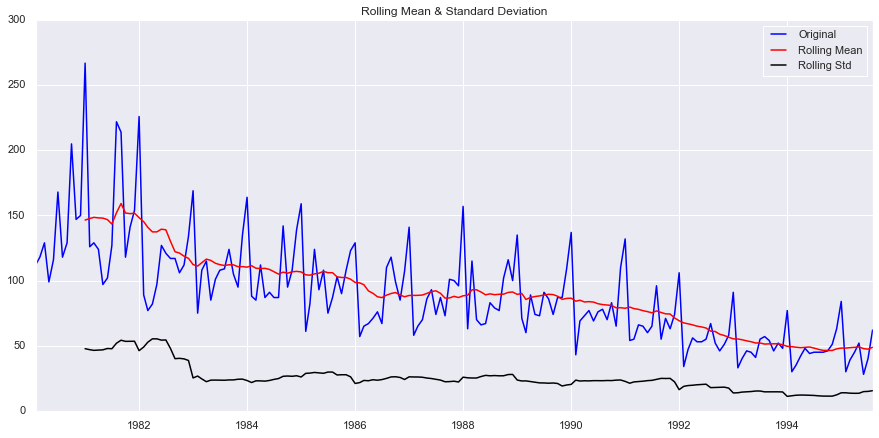

Results of Dickey-Fuller Test:
Test Statistic                  -1.874856
p-value                          0.343981
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [110]:
test_stationarity(df['Rose Wine Sales'])

<span class="burk">Conclusion :</span>

As we know that in Dickey-Fuller Test : H:0 = The series is non-stationary. H:A = The series is stationary.

On comparing the p-value , we found p-value is greater than the 5% significant level ,hence we fail to reject the null hypothesis & reached on the conclusion that he Time Series is non-stationary.

##### Let us take a difference of order 1 and check whether the Time Series is stationary or not.

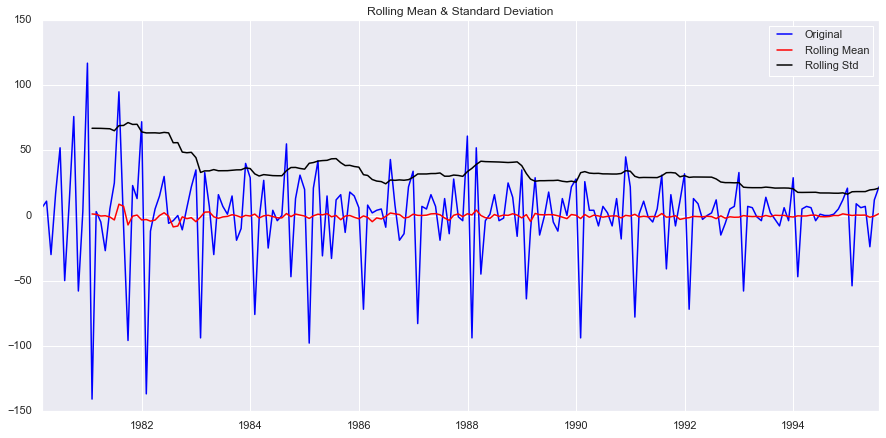

Results of Dickey-Fuller Test:
Test Statistic                -8.044139e+00
p-value                        1.813580e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [111]:
test_stationarity(df['Rose Wine Sales'].diff().dropna())

<span class="burk">Conclusion :</span>

As we know that in Dickey-Fuller Test : H:0 = The series is non-stationary. H:A = The series is stationary.

On comparing the p-value , we found p-value is less than the 5% significant level ,hence we reject the null hypothesis & reached on the conclusion that he Time Series is stationary with difference of order 1.We see that at α = 0.05 the Time Series is indeed stationary.

#### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

##### Automated version of an ARIMA model with the lowest Akaike Information Criteria (AIC).

###### Checking the Stationarity of the Train Data

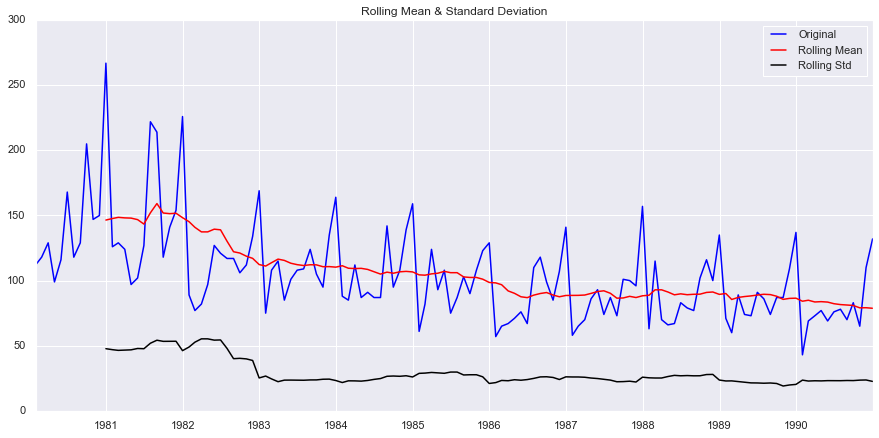

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [112]:
test_stationarity(train['Rose Wine Sales'])

<span class="burk">Conclusion</span>

We see that the series is not stationary at α = 0.05.

###### Let us take a difference of order 1 and check whether the Train Time Series is stationary or not.

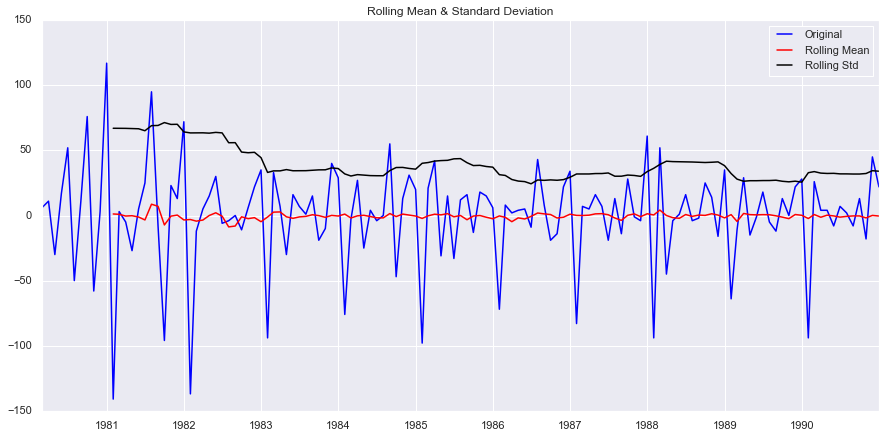

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [113]:
test_stationarity(train['Rose Wine Sales'].diff().dropna())

<span class="burk">Conclusion</span>

We see that after taking a difference of order 1 the series have become stationary at α = 0.05.

<span class="burk">Note</span>

If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

###### Checking the Info of the Train Data

In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rose Wine Sales  132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


###### Checking for the combination of different parameters of p and q in the range.

<span class="burk">Note</span>

The data has some seasonality so ideally we should build a SARIMA model. But here we are building an ARIMA / SARIMA model by looking at the minimum AIC criterion.

In [115]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3) #p=0,1,2=q --- Range of Values for p and q.
d= range(1,2) #d=1----Rnage of Values for d.
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [116]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [117]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose Wine Sales'].values,
                        order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param, ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({
        'param': param,
        'AIC': ARIMA_model.aic
    },
                                 ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.726183046448
ARIMA(0, 1, 2) - AIC:1276.8353727957747
ARIMA(1, 1, 0) - AIC:1319.3483105802602
ARIMA(1, 1, 1) - AIC:1277.775749775043
ARIMA(1, 1, 2) - AIC:1277.3592236734212
ARIMA(2, 1, 0) - AIC:1300.6092611743966
ARIMA(2, 1, 1) - AIC:1279.045689409315
ARIMA(2, 1, 2) - AIC:1279.2986939365064


In [118]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1276.835373
5  (1, 1, 2)  1277.359224
4  (1, 1, 1)  1277.775750
7  (2, 1, 1)  1279.045689
8  (2, 1, 2)  1279.298694
1  (0, 1, 1)  1280.726183
6  (2, 1, 0)  1300.609261
3  (1, 1, 0)  1319.348311
0  (0, 1, 0)  1335.152658

###### Building Automated version of an ARIMA model with the lowest Akaike Information Criteria (AIC).

In [119]:
auto_ARIMA = ARIMA(train['Rose Wine Sales'], order=(0,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:      D.Rose Wine Sales   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Mon, 20 Dec 2021   AIC                           1276.835
Time:                        02:27:24   BIC                           1288.336
Sample:                    02-29-1980   HQIC                          1281.509
                         - 12-31-1990                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose Wine Sales    -0.7601      0.101     -7.499      0.000      -0.959      -0.561


<span class="burk">Conclusion</span>

By looking the ARIMA model summary we found that the p-values of all the components of the ARIMA model are significant.Hence the value which we get for p,d & q from lowest AIC are significant.

###### Predict on the Test Set using this Model and Evaluate the model (RMSE).

In [120]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [121]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose Wine Sales'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.624861973563895


In [122]:
model_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Auto_ARIMA(0,1,2)'])

model_resultsDf

Test RMSE
Auto_ARIMA(0,1,2)  15.624862

##### Automated version of the SARIMA model with the lowest Akaike Information Criteria (AIC).

###### Plotting ACF plot to understand the seasonal parameter for the SARIMA model.

<span class="burk">Note</span>

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

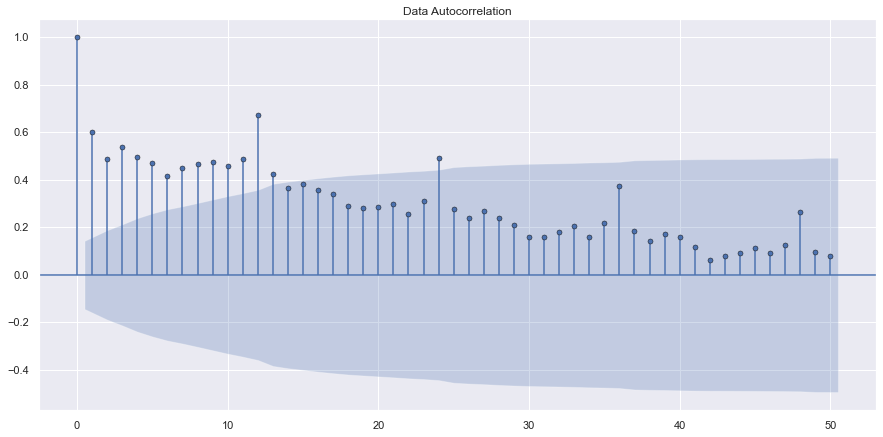

In [123]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Rose Wine Sales'],lags=50,title='Data Autocorrelation')
plt.show()

<span class="girk">Conclusion</span>

By looking the ACF plot we found a pattern that every 12th lag is significant and repeating itself in the same pattern so building a SARIMA model we take seasonality of  12 and built the model. We will run our auto SARIMA models by setting seasonality of 12.

###### Checking for the combination of different parameters of ( p d q ) and (P,D,Q) by setting the seasonality as 12 for the auto SARIMA model.

In [124]:
import itertools
p = q = range(0, 3)
d= range(1,2) 
D = range(0,1) 
P=Q=range(0,3)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))] #P,D,Q
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [125]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [126]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose Wine Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207175
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380889
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386002
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635750373
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697546
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945712
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918334
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383817
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918292
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330945698
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483311407
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536103
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461675
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988257718638
SARIMA(0, 1, 2)x(0, 0

In [127]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  887.937509
53  (1, 1, 2)  (2, 0, 2, 12)  889.903852
80  (2, 1, 2)  (2, 0, 2, 12)  890.668798
69  (2, 1, 1)  (2, 0, 0, 12)  896.518161
78  (2, 1, 2)  (2, 0, 0, 12)  897.346444

###### Building Automated Version of SARIMA Model.

In [128]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose Wine Sales'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Mon, 20 Dec 2021   AIC                            887.938
Time:                                    02:27:59   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.960     -0.004      0.996    -373.157     371.472
ma.L2         -0.1573     29.844   

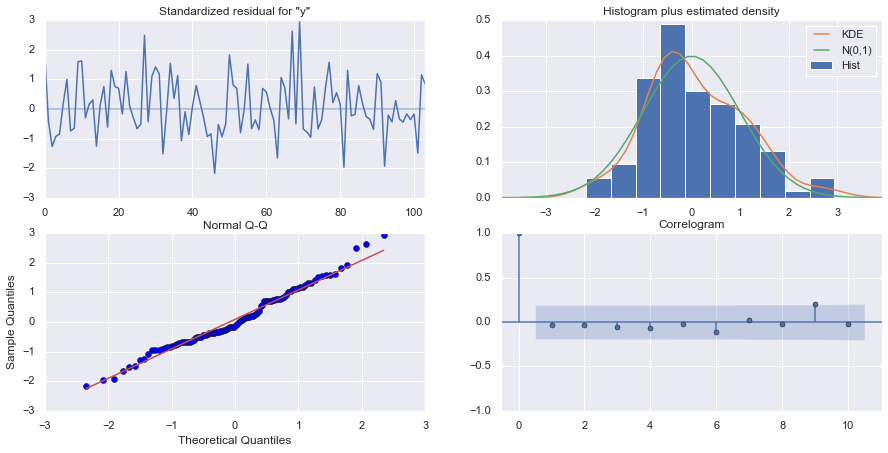

In [129]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

###### Predict on the Test Set using the Auto SARIMA model and Evaluate the model.

In [130]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [131]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.867264  15.928501      31.647976      94.086553
1  70.541190  16.147659      38.892360     102.190020
2  77.356411  16.147657      45.707585     109.005236
3  76.208814  16.147657      44.559988     107.857639
4  72.747398  16.147657      41.098572     104.396224

In [132]:
rmse = mean_squared_error(test['Rose Wine Sales'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.949019122116677


In [133]:
auto_sarima_12_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Auto_SARIMA(0,1,2)(2,0,2,12)'])


model_resultsDf = pd.concat([model_resultsDf,auto_sarima_12_resultsDf])

model_resultsDf

Test RMSE
Auto_ARIMA(0,1,2)             15.624862
Auto_SARIMA(0,1,2)(2,0,2,12)  26.949019

#### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

##### ARIMA model based on the cut-off points of ACF and PACF.

**ACF and PACF plots to get the values for p and q.**

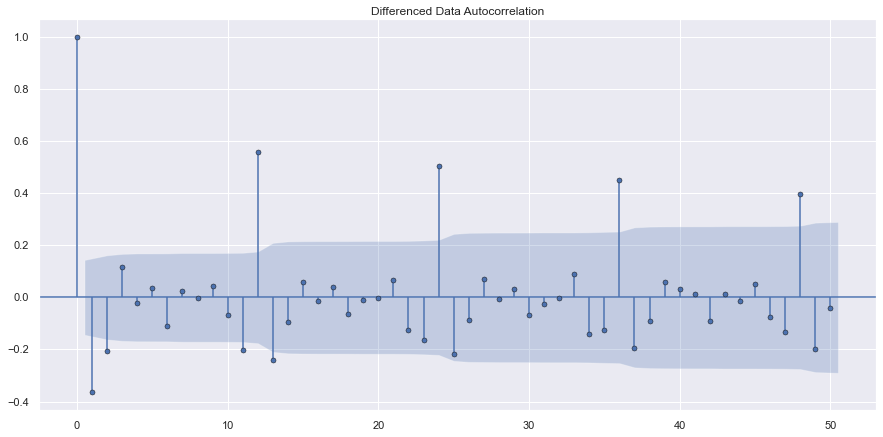

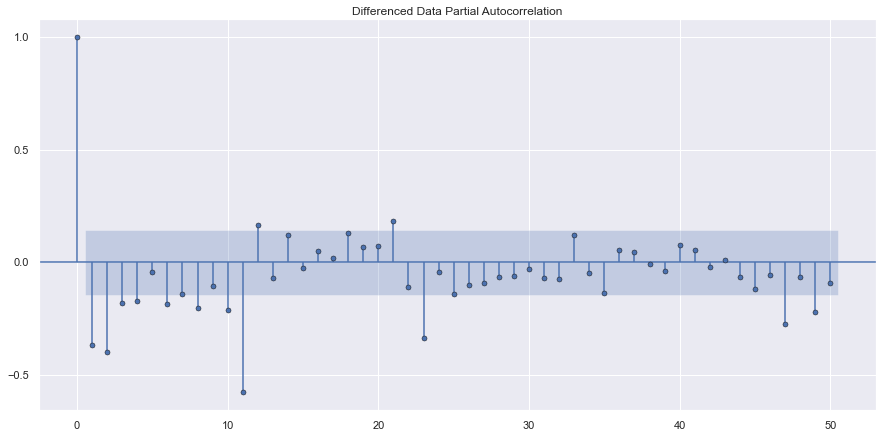

In [134]:
plot_acf(df['Rose Wine Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose Wine Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

<span class="girk">Conclusion</span>

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 4.

The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.

###### Building ARIMA model based on the cut-off points of ACF and PACF.

In [135]:
manual_ARIMA = ARIMA(train['Rose Wine Sales'].astype('float64'), order=(4,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:      D.Rose Wine Sales   No. Observations:                  131
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -633.876
Method:                       css-mle   S.D. of innovations             29.793
Date:                Mon, 20 Dec 2021   AIC                           1283.753
Time:                        02:28:00   BIC                           1306.754
Sample:                    02-29-1980   HQIC                          1293.099
                         - 12-31-1990                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1905      0.576     -0.331      0.741      -1.319       0.938
ar.L1.D.Rose Wine Sales     1.1685      0.087     13.391      0.000       0.997       1.340


###### Predict on the Test Set using the Mannual ARIMA model and evaluate the model.

In [136]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [137]:
rmse = mean_squared_error(test['Rose Wine Sales'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

33.96947074765847


In [138]:
manual_arima_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual_ARIMA(4,1,2)'])


model_resultsDf = pd.concat([model_resultsDf,manual_arima_resultsDf])

model_resultsDf

Test RMSE
Auto_ARIMA(0,1,2)             15.624862
Auto_SARIMA(0,1,2)(2,0,2,12)  26.949019
Manual_ARIMA(4,1,2)           33.969471

##### Manual SARIMA model based on the cut-off points of ACF and PACF.

<span class="burk">Note</span> 

Build a version of the Manual SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12.

**Let us look at the original series.**

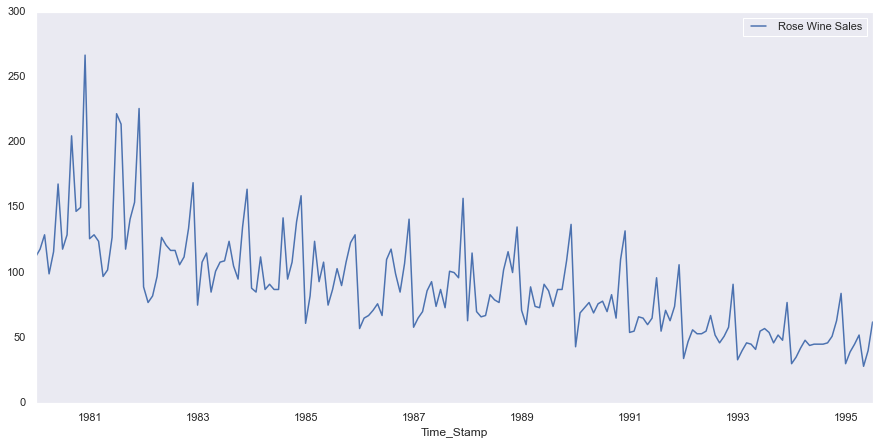

In [139]:
df.plot()
plt.grid();

**We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.**

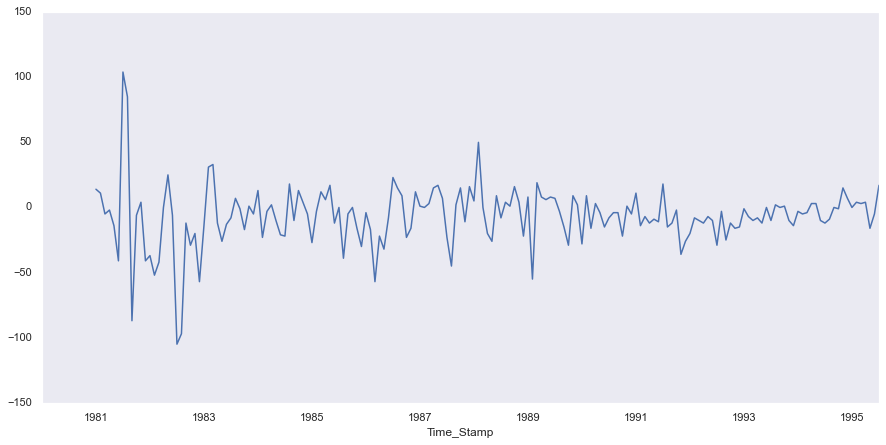

In [140]:
(df['Rose Wine Sales'].diff(12)).plot() #we take diff order of 12 because we have seasonality of that order.
plt.grid();

<span class="girk">Conclusion</span>

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

###### Checking the Stationarity - Dickey-Fuller Test

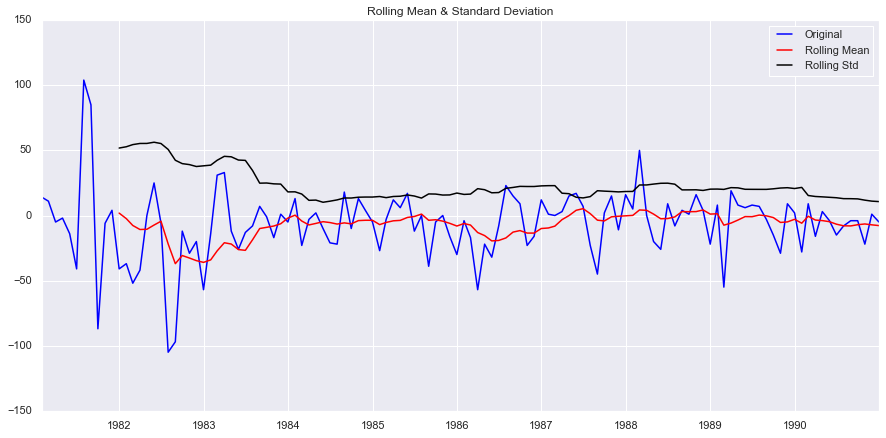

Results of Dickey-Fuller Test:
Test Statistic                  -3.619482
p-value                          0.005399
#Lags Used                      11.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [141]:
test_stationarity((train['Rose Wine Sales'].diff(12).dropna())) #D=0

<span class="mark">Result</span>

As the looking ate the p-value we conclude that the series is stationary.We donot want further differencing of seasonal differenced series as we found it stationary so we get value of D=0.

###### Ploting ACF AND PACF Plots with Seasonal Diff to get the Value of P AND Q.

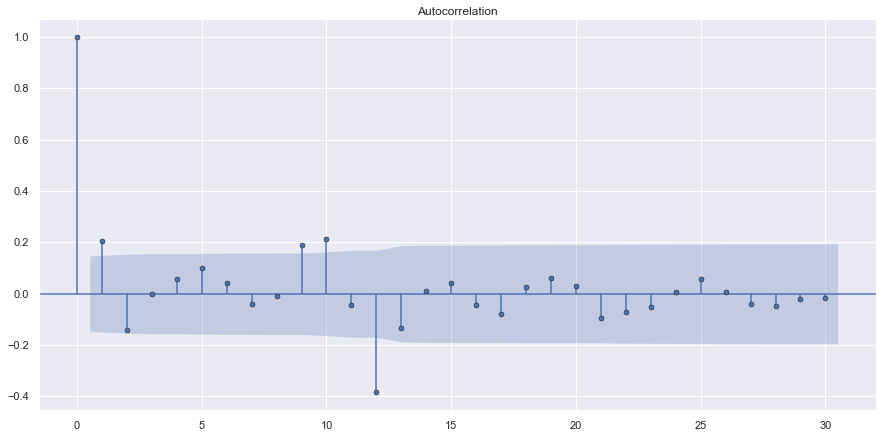

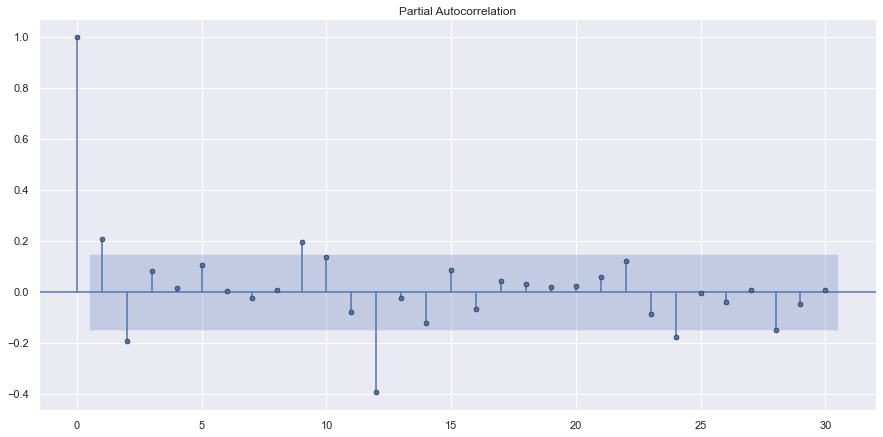

In [142]:
plot_acf((df['Rose Wine Sales'].diff(12).dropna()).dropna(),lags=30)
plot_pacf((df['Rose Wine Sales'].diff(12).dropna()).dropna(),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12. We will keep the p ,d and q parameters same as the Mannual ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0.We get value of P = 2 The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0. We get value of Q=1 Remember to check the ACF and the PACF plots only at multiples of 12 (since 12 is the seasonal period).

###### Building the Manual SARIMA Model at Seasonality 12.

In [143]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose Wine Sales'].values,
                                order=(4, 1, 2),
                                seasonal_order=(2, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(2, 0, [1], 12)   Log Likelihood                -430.931
Date:                              Mon, 20 Dec 2021   AIC                            881.862
Time:                                      02:28:03   BIC                            908.210
Sample:                                           0   HQIC                           892.534
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7465      0.297     -2.518      0.012      -1.328      -0.165
ar.L2          0.02

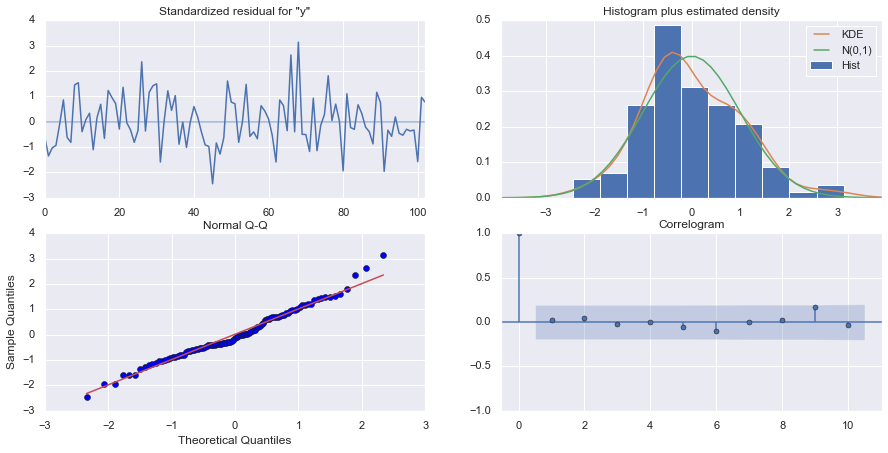

In [144]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

<span class="mark">Results</span>

The model diagnostics plot looks okay.

###### Predict on the Test Set using this Manual SARIMA model and evaluate the model.

In [145]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [146]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.030432  15.642372      31.371947      92.688918
1  69.142418  15.790820      38.192979     100.091857
2  76.645851  15.822683      45.633962     107.657740
3  77.846289  15.822648      46.834469     108.858110
4  73.041577  15.842418      41.991008     104.092146

In [147]:
rmse = mean_squared_error(test['Rose Wine Sales'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

28.09706375062283


In [148]:
manual_sarima_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual SARIMA(4,1,2)(2,0,1,12)'])


model_resultsDf = pd.concat([model_resultsDf,manual_sarima_resultsDf])

model_resultsDf

Test RMSE
Auto_ARIMA(0,1,2)               15.624862
Auto_SARIMA(0,1,2)(2,0,2,12)    26.949019
Manual_ARIMA(4,1,2)             33.969471
Manual SARIMA(4,1,2)(2,0,1,12)  28.097064

#### 8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [149]:
Finalised_TSF_model_resultsDf = pd.concat([Model_Results_Df,model_resultsDf],axis=0)
Finalised_TSF_model_resultsDf

Test RMSE
Regression On Time                                   15.275732
Naive Model                                          79.738550
Simple Average Model                                 53.480857
2 Point Trailing Moving Average                      11.529409
4 Point Trailing Moving Average                      14.455221
6 PointTrailing Moving Average                       14.572009
9 PointTrailing Moving Average                       14.731209
Alpha=0.09874,Simple Exponential Smoothing           36.816904
Alpha=0.3,Simple Exponential Smoothing               47.525251
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.591922
Alpha=0.100,Beta=2.966e-06,Gamma=3.7528e-07,Tri...    9.790009
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...   10.951007
Auto_ARIMA(0,1,2)                                    15.624862
Auto_SARIMA(0,1,2)(2,0,2,12)                         26.949019
Manual_ARIMA(4,1,2)                                  33.969471
Manual SARIMA(4,1,2)(2,0,1,12)                       28.097064

In [150]:
Finalised_TSF_model_resultsDf.sort_values(by=['Test RMSE']).head()

Test RMSE
Alpha=0.100,Beta=2.966e-06,Gamma=3.7528e-07,Tri...   9.790009
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...  10.951007
2 Point Trailing Moving Average                     11.529409
4 Point Trailing Moving Average                     14.455221
6 PointTrailing Moving Average                      14.572009

#### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [151]:
Finalised_TSF_model_resultsDf.sort_values(by=['Test RMSE']).head()

Test RMSE
Alpha=0.100,Beta=2.966e-06,Gamma=3.7528e-07,Tri...   9.790009
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...  10.951007
2 Point Trailing Moving Average                     11.529409
4 Point Trailing Moving Average                     14.455221
6 PointTrailing Moving Average                      14.572009

<span class="mark">Conclusion</span>

From the above Test RMSE results we conclude that Alpha=0.100,Beta=2.966e-06,Gamma=3.7528e-07,Triple Exponential Smoothing model is the best model with least RMSE among all the models.

##### Building the most optimum model on the Full Data.

In [152]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.10053559166352141,
                                                                 smoothing_trend=0.0000029667113597565187,
                                                                 smoothing_seasonal=0.0000003752823638129799)

In [153]:
print(fullmodel1.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:          Rose Wine Sales   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                          48465.592
Optimized:                         True   AIC                           1071.253
Trend:                         Additive   BIC                           1122.950
Seasonal:                Multiplicative   AICC                          1075.324
Seasonal Periods:                    12   Date:                 Mon, 20 Dec 2021
Box-Cox:                          False   Time:                         02:28:04
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1005356                alpha                False
smoothing_trend          

In [154]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Rose Wine Sales'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 16.098890944223697


In [155]:
prediction_1 = fullmodel1.forecast(steps=12)

In [156]:
prediction_1.head()

1995-08-31    47.199078
1995-09-30    44.001920
1995-10-31    42.881843
1995-11-30    49.101689
1995-12-31    66.742355
Freq: M, dtype: float64

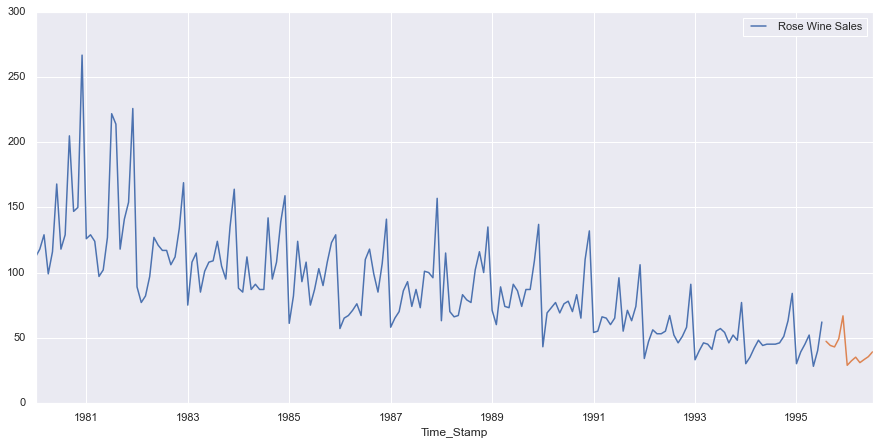

In [157]:
df.plot()
prediction_1.plot();

##### Calculating the Confidence Bands at 95% confidence level

<span class="burk">Note</span>

One assumption that we have made over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [158]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction   upper_ci
1995-08-31  15.560545   47.199078  78.837612
1995-09-30  12.363386   44.001920  75.640453
1995-10-31  11.243310   42.881843  74.520377
1995-11-30  17.463155   49.101689  80.740222
1995-12-31  35.103821   66.742355  98.380888

##### Plot of forecast along with the confidence band

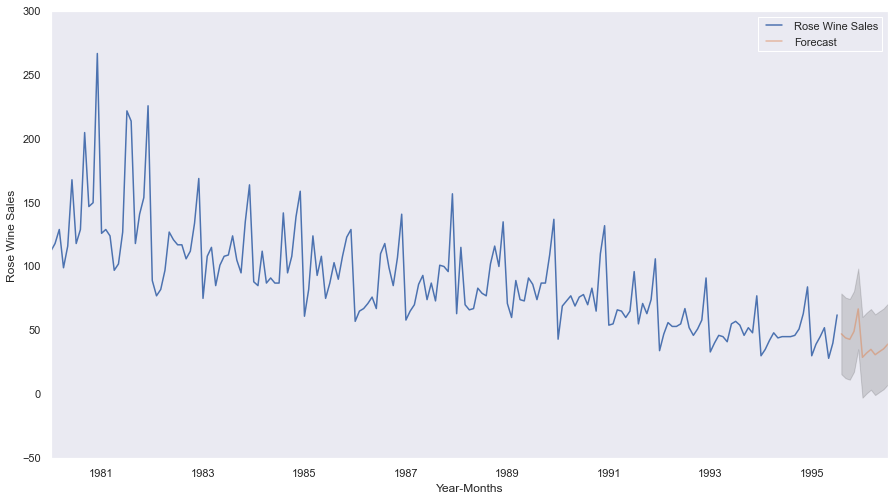

In [159]:
axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose Wine Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

**Insights**

From the Plot of the forecast on full data along with the confidence band we infer that with 95% of the confidence level we found that forecast also follows the same pattern as original Rose wine sales series follows going downwards.

#### 10 .Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

The purpose of this whole exercise is to explore the dataset , analyse and forecast  Rose Wine Sales in the 20th century.Here we perform the exploratory data analysis & apply various time series forecasting models like Linear Regression , Navie Forecast ,Simple Average , Moving Average and various kind of exponential smoothing models like (Simple , Double , Triple Exponential ) and ARIMA / SARIMA models on the Rose Wine Sales dataset and check their RMSE on the test data , model which gives the least RMSE will be the final model for us to analyse and forecast the Rose Wine Sales in the 20th century.

**Insights of EDA /  Data Visualization and Time Series Forecasting Models  :**

We can see that there is a downward trend in the series with a seasonal pattern associated as well.Moreover we found that some data is missing from the series too. We will check the missing values and impute them as well by suitable method.

**Description of the Original Rose Wine Sales Time Series**
 
Rose Wine Sales ranges from a minimum of 28 to maximum of 267. 
Mean of the Rose Wine Sales is around 90.394595. 
Standard Deviation of the Rose Wine Sales is 39.175344. 
25% , 50% (median) and 75 % of Rose Wine Sales are 63 ,86 and 112.

**Information about the Original Sparkling Wine Sales Time Series**
 
From the above results we can see that there is 2 null values present in the dataset.
There are total 187 entries of Rose wines Sales as per Monthly frequency in this dataset,indexed from 1980-01-31 to 1995-07-31.
Rose Wine Sales column have d-type of float64. 
Memory used by the dataset: 2.9 KB.

There is 2 Null Values Present in the Dataset.So we need to impute the missing value present in the data with some meaningful value by using suitable null value imputation method.In this problem we impute the null values by forwardfill null value method. We successfully impute the null values by forward fillna method. Now we donot have any null values in the data.

The Rose.csv data set has 187 observations (rows) and 1 variable (column named as Rose Wine Sales) in the dataset.

**Year on Year boxplot for the Rose Wine Sales.**

As we got to know from the Time Series plot, the box-plots over here also indicates a measure of trend being present. Also, we see that the Rose Wine Sales have outliers for the years.The yearly boxplots also shows that the Sales have decreased year after year.
Box-plot of Year 1980 and 1981 have max median value,from this we can clearly infer that year 1981 have maximum Rose Wine Sales.
Box-plot of Year 1995 have min median value,we can clearly infer that year 1995 have minimum Rose Wine Sales.

**Monthly Box-Plot for the Rose Wine Sales Taking all the Years into Account**

The Box-Plots for the monthly Rose Wine Sales for different years very few outliers in the month 6 , 7, 8,9 and 12 show outliers , rest doesn't show any outliers.
From September to December the Rose Wine Sales increasing , so this the period where the Rose Wine Sales is highest.
December is the month of highest Rose Wine Sales every year whereas jan is the month of lowest Rose wine sales. 
There is seasonality also every year from September to December the Rose Wine Sales increasing.

**Month-Plot of Rose Wine Sales Time Series**

As noticed in the above box-plot we get same result from here too. From September to December Rose Wine Sales goes on increasing.
December month have the highest sales of the Rose Wine while Jan month have low sales of the Rose Wine.

**Time Series Plot for different months for different years**

This plot gives us information about the monthly trend across the years.Here in this plot every line is a month tells us about the sales of Rose Wines of each month across the year.This is way to show year on year monthly trend.
From the above plot we clearly infer that December month have highest sales of Rose Wine.
Jan month have the lowest sales of the Rose Wine.

Here we apply various time series forecasting models like Linear Regression , Navie Forecast ,Simple Average , Moving Average and various kind of exponential smoothing models like (Simple , Double , Triple Exponential ) and ARIMA / SARIMA models on the Sparkling Wine Sales dataset and check their RMSE on the test data , After comparing the TEST RMSE of all the model that we built. We come know that the TEST RMSE of Alpha=0.100,Beta=2.966e-06,Gamma=3.7528e-07,TripleExponentialSmoothingModel is least  among all the models with different parameters. So we take Alpha=0.100,Beta=2.966e-06,Gamma=3.7528e-07,TripleExponentialSmoothing Model to built complete data and predict 12 months into the future with appropriate confidence intervals/bands.

**RMSE of the Full Model is - 16.098890944223697**

From the Plot of the forecast on full data along with the confidence band we infer that with 95% of the confidence level we found that forecast also follows the same pattern as original Rose wine sales series follows going downwards.

**Recommendations:**

The ABC Estate Wines company should focus on key strengths & develop marketing strategies to promote Rose Wine Sales . As we From Sept to Dec the Rose wine sales are increasing and highest in December but in the month of Jan  it was low  so wine company can run various offers during this period to boost their rose  wine sales as this time is new year weekend so company can give various offers like buy 1 get 1 or some interesting gifts on purchase of rose wine to attract more customers. Such activities can help wine comapny to increase their sales of rose wine in jan month.

                                    -The End-